## Semester Project: Building Recommendation Engine on Books datasets
|            |                                                |
|------------|----------------------------------------------- |
|Name        | Raja sekhar Pothina, Chandrashekar Akkenapally |
|Group       | Group 1                                        |
|Email       | rp6kp@umsystem.edu , ca7kr@umsystem.edu        |
|Course      | CS 5402                                        |
|Assignment  | Semester Project                               |
|Date        | 29-Jul-2022                                    |
|GitHub link | https://git-classes.mst.edu/rp6kp/sem_proj     |

## Concept Description:
<p style='text-align: justify;'>
This assignment is about understanding and implement a simple recommendation system using K-Nearest Neighbors, 1R  Classifier and Single Vector Decomposition.
</p>


## Data Collection: 
The  data set was provided by our Instructor Mr.Perry Koob<br>
The data given in the dataset has values that can help us to build a recommendation system that can suggest books for someone who has read Stardust by Neil Gaiman.




## Example Description



<strong>goodreads_book_id        </strong><br>
This attribute represent unique id of a book in goodreads website .This is a <em>Nominal</em> attribute type and Number data type
<hr>
<strong>cover_link                    </strong><br>
This attribute represent cover link of a book in goodreads website .This is a <em>Nominal</em> attribute type and String data type
<hr>
<strong>title                    </strong><br>
This attribute represent title of a book in goodreads website .This is a <em>Nominal</em> attribute type and String data type
<hr>
<strong>series                   </strong><br>
This attribute represent series that a book belongs to in goodreads website .This is a <em>Nominal</em> attribute type and String data type
<hr>
<strong>author                   </strong><br>
This attribute represent author of a book in goodreads website .This is a <em>Nominal</em> attribute type and String data type
<hr>
<strong>rating_count             </strong><br>
This attribute represent rating given for a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>review_count             </strong><br>
This attribute represent reviews given for a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>average_rating           </strong><br>
This attribute represent average rating of a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>five_star_ratings        </strong><br>
This attribute represent the count of the five star rating given to a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>four_star_ratings        </strong><br>
This attribute represent the count of four star rating given to a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>three_star_ratings       </strong><br>
This attribute represent the count of three star rating given to a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>two_star_ratings         </strong><br>
This attribute represent the count of two star rating given to a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>one_star_ratings         </strong><br>
This attribute represent the count of one star rating given to a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>tag_id                   </strong><br>
This attribute represent id of a tag of a book in goodreads website .This is a <em>Nominal</em> attribute type and Number data type
<hr>
<strong>tag_count                    </strong><br>
This attribute represent no of user given the same tag for a book in goodreads website .This is a <em>Ratio</em> attribute type and Number data type
<hr>
<strong>tag_name                 </strong><br>
This attribute represent tag name given by the user for a book in goodreads website .This is a <em>Nominal</em> attribute type and String data type
<hr>
<strong>title_with_series_name   </strong><br>
This attribute is a derived to identify a book if any two books has same title but belongs to different series eg: books with title <em>Selected Poems</em>.This is a <em>Nominal</em> attribute type and String data type
<hr>


## Attributes level of measurement

| Attributes               |Level of Measurement|
|--------------------------|--------------------|
| goodreads_book_id        | Interval           |
| cover_link               | Nominal            |
| title                    | Nominal            |
| series                   | Nominal            |
| author                   | Nominal            |
| rating_count             | Ratio              |
| review_count             | Ratio              |
| average_rating           | Ratio              |
| five_star_ratings        | Ratio              |
| four_star_ratings        | Ratio              |
| three_star_ratings       | Ratio              |
| two_star_ratings         | Ratio              |
| one_star_ratings         | Ratio              |
| tag_id                   | Interval           |
| tag_count                | Ratio              |
| tag_name                 | Nominal            |
| title_with_series_name   | Nominal            |

In [1]:
# Imports

import matplotlib as mpl
import importlib
from sklearn.metrics import classification_report
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np
import altair as alt
alt.data_transformers.enable('default', max_rows=None)
import matplotlib.pyplot as plt

importlib.reload(mpl)
importlib.reload(plt)
importlib.reload(sns)
params = {
    # "font.family":  "sans-serif",
    # "font.style":   "normal",
    # "font.variant": "normal",
    # "font.weight":  "bold",
    # "font.stretch": "normal",
    'legend.fontsize': 15,
    'axes.labelsize':15,
    'axes.titlesize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    "figure.titlesize": 20,
    "figure.figsize": (5.0,5.0),
    "figure.dpi":200
}
%matplotlib inline
plt.rcParams.update(params)

# mpl.rcParams.update(mpl.rcParamsDefault)

warnings.filterwarnings('ignore')


## Data Import and Wrangling

In [2]:

# load dataset
book_tags = pd.read_csv(str(f"../src-data/book_tags.csv"))
goodreads_books_cols = ['goodreads_book_id', 'cover_link', 'title', "series", "author", "rating_count", "review_count",
                        "average_rating", "five_star_ratings", "four_star_ratings", "three_star_ratings", "two_star_ratings", "one_star_ratings"]
goodreads_books = pd.read_csv(str(f"../src-data/goodreads_books.csv"),
                              usecols=goodreads_books_cols,encoding="utf-8", encoding_errors="replace")
tags = pd.read_csv(str(f"../src-data/tags.csv"))


In [3]:
print(f"book_tags: {book_tags.shape}, goodreads_books: {goodreads_books.shape},tags: {tags.shape}")

book_tags: (9972, 3), goodreads_books: (52201, 13),tags: (83, 2)


In [4]:
# merging all the dataframes to form the actual dataframe
books_tagnames = book_tags.merge(tags, on='tag_id')

goodreads_books_tags = goodreads_books.merge(
    books_tagnames, how="outer", on="goodreads_book_id")

goodreads_books_tags.count
# renaming the count column from tag data frame to tag_count for better understanding
goodreads_books_tags = goodreads_books_tags.rename(columns={"count": "tag_count"})
goodreads_books_tags.tag_count
goodreads_books_tags.dtypes

goodreads_book_id      object
title                  object
series                 object
cover_link             object
author                 object
rating_count          float64
review_count          float64
average_rating        float64
five_star_ratings     float64
four_star_ratings     float64
three_star_ratings    float64
two_star_ratings      float64
one_star_ratings      float64
tag_id                float64
tag_count             float64
tag_name               object
dtype: object

In [5]:
goodreads_books_tags.head(10)

goodreads_book_id                                              title  \
0            630104                                       Inner Circle   
1              9487                                  A Time to Embrace   
2           6050894                                           Take Two   
3             39030                                          Reliquary   
4               998  The Millionaire Next Door: The Surprising Secr...   
5            311164                                        Black Sheep   
6             32105                                          Sylvester   
7            377993                                                Joe   
8             71292                                   Asterix the Gaul   
9            821003                            When We Were Very Young   

                 series                                         cover_link  \
0          (Private #5)  https://i.gr-assets.com/images/S/compressed.ph...   
1    (Timeless Love #2)  https://i.gr-assets.com/images/S/compressed.ph...   
2   (Above the Line #2)  https://i.gr-assets.com/images/S/compressed.ph...   
3       (Pendergast #2)  https://i.gr-assets.com/images/S/compressed.ph...   
4                   NaN  https://i.gr-assets.com/images/S/compressed.ph...   
5                   NaN  https://i.gr-assets.com/images/S/compressed.ph...   
6                   NaN  https://i.gr-assets.com/images/S/compressed.ph...   
7                   NaN  https://i.gr-assets.com/images/S/compressed.ph...   
8         (AstÃ©rix #1)  https://i.gr-assets.com/images/S/compressed.ph...   
9  (Winnie-the-Pooh #3)  https://i.gr-assets.com/images/S/compressed.ph...   

                                              author  rating_count  \
0                          Kate Brian, Julian Peploe        7597.0   
1                                    Karen Kingsbury        4179.0   
2                                    Karen Kingsbury        6288.0   
3                     Douglas Preston, Lincoln Child       38382.0   
4                Thomas J. Stanley, William D. Danko       72168.0   
5                                    Georgette Heyer        9538.0   
6                         Georgette Heyer, Joan Wolf       13473.0   
7                                        Larry Brown        2722.0   
8  RenÃ© Goscinny, Albert Uderzo, Anthea Bell, De...       23324.0   
9                      A.A. Milne, Ernest H. Shepard       21973.0   

   review_count  average_rating  five_star_ratings  four_star_ratings  \
0         196.0            4.03             3045.0             2323.0   
1         177.0            4.35             2255.0             1290.0   
2         218.0            4.23             3000.0             2020.0   
3        1424.0            4.01            12711.0            15407.0   
4        3217.0            4.04            27594.0            25219.0   
5         775.0            4.05             3298.0             3831.0   
6        1141.0            4.11             5216.0             5225.0   
7         260.0            4.18             1111.0             1119.0   
8         534.0            4.17            10488.0             7797.0   
9         532.0            4.30            11753.0             6063.0   

   three_star_ratings  two_star_ratings  one_star_ratings  tag_id  tag_count  \
0              1748.0             389.0              92.0     NaN        NaN   
1               518.0              93.0              23.0     NaN        NaN   
2              1041.0             183.0              44.0     NaN        NaN   
3              8511.0            1429.0             324.0     NaN        NaN   
4             14855.0            3414.0            1086.0     NaN        NaN   
5              2042.0             304.0              63.0     NaN        NaN   
6              2470.0             434.0             128.0     NaN        NaN   
7               385.0              76.0              31.0     NaN        NaN   
8              3942.0            

In [6]:
# Understand the data tail() returns the last 10 rows of the dataset
goodreads_books_tags.tail(10)

goodreads_book_id title series cover_link author  rating_count  \
57621          25041504   NaN    NaN        NaN    NaN           NaN   
57622          25816688   NaN    NaN        NaN    NaN           NaN   
57623          25837341   NaN    NaN        NaN    NaN           NaN   
57624          26192646   NaN    NaN        NaN    NaN           NaN   
57625          29925715   NaN    NaN        NaN    NaN           NaN   
57626             11149   NaN    NaN        NaN    NaN           NaN   
57627             32067   NaN    NaN        NaN    NaN           NaN   
57628              5544   NaN    NaN        NaN    NaN           NaN   
57629          23093367   NaN    NaN        NaN    NaN           NaN   
57630          23093367   NaN    NaN        NaN    NaN           NaN   

       review_count  average_rating  five_star_ratings  four_star_ratings  \
57621           NaN             NaN                NaN                NaN   
57622           NaN             NaN                NaN                NaN   
57623           NaN             NaN                NaN                NaN   
57624           NaN             NaN                NaN                NaN   
57625           NaN             NaN                NaN                NaN   
57626           NaN             NaN                NaN                NaN   
57627           NaN             NaN                NaN                NaN   
57628           NaN             NaN                NaN                NaN   
57629           NaN             NaN                NaN                NaN   
57630           NaN             NaN                NaN                NaN   

       three_star_ratings  two_star_ratings  one_star_ratings   tag_id  \
57621                 NaN               NaN               NaN   8717.0   
57622                 NaN               NaN               NaN   8717.0   
57623                 NaN               NaN               NaN   8717.0   
57624                 NaN               NaN               NaN   8717.0   
57625                 NaN               NaN               NaN   8717.0   
57626                 NaN               NaN               NaN  11743.0   
57627                 NaN               NaN               NaN   7457.0   
57628                 NaN               NaN               NaN  26816.0   
57629                 NaN               NaN               NaN  13561.0   
57630                 NaN               NaN               NaN   7778.0   

       tag_count           tag_name  
57621    10773.0  currently-reading  
57622     2874.0  currently-reading  
57623     3417.0  currently-reading  
57624     2035.0  currently-reading  
57625     2235.0  currently-reading  
57626     2357.0            fiction  
57627     3180.0           classics  
57628     2033.0            science  
57629     3053.0     graphic-novels  
57630     2273.0             comics

In [7]:
# for understanding the shape of dataset
# print("Shape: ", goodreads_books_tags.shape)
print(
    f"There are {goodreads_books_tags.shape[1]} columns in this dataset and {goodreads_books_tags.shape[0]} rows in the dataset")


There are 16 columns in this dataset and 57631 rows in the dataset


In [8]:
print(goodreads_books_tags.dtypes)

goodreads_book_id      object
title                  object
series                 object
cover_link             object
author                 object
rating_count          float64
review_count          float64
average_rating        float64
five_star_ratings     float64
four_star_ratings     float64
three_star_ratings    float64
two_star_ratings      float64
one_star_ratings      float64
tag_id                float64
tag_count             float64
tag_name               object
dtype: object


## Handling Duplicate and Missing Values

#### Handling row having same title but different tag-names to have tag-names which has max count

In [9]:

idx = book_tags.groupby(["goodreads_book_id"])["count"].transform(
    max) == book_tags['count']
book_tags = book_tags[idx]

books_tagnames = book_tags.merge(tags, on='tag_id')
print("books_tagname shape: ",books_tagnames.shape)
goodreads_books_tags = goodreads_books.merge(
    books_tagnames, how="outer", on="goodreads_book_id")

print("goodreads_books_tags: ",goodreads_books_tags.shape)


books_tagname shape:  (7048, 4)
goodreads_books_tags:  (54707, 16)


In [10]:
columns = goodreads_books_tags.columns

def show_missing_info(columns):
    for a in columns:
        if goodreads_books_tags[a].isnull().any().sum():
            print(a, ' has: ', goodreads_books_tags[a].isnull(
            ).sum(), ' missing values')
        else:
            print(a,'has no missing values')

show_missing_info(columns)

goodreads_book_id has no missing values
title  has:  2508  missing values
series  has:  31388  missing values
cover_link  has:  3115  missing values
author  has:  2508  missing values
rating_count  has:  2508  missing values
review_count  has:  2508  missing values
average_rating  has:  2508  missing values
five_star_ratings  has:  2508  missing values
four_star_ratings  has:  2508  missing values
three_star_ratings  has:  2508  missing values
two_star_ratings  has:  2508  missing values
one_star_ratings  has:  2508  missing values
tag_id  has:  47659  missing values
count  has:  47659  missing values
tag_name  has:  47659  missing values


#### Books without title are removed from the dataframe by merging with left

In [11]:
goodreads_books_tags = goodreads_books.merge(
    books_tagnames, how="left", on="goodreads_book_id")
goodreads_books_tags = goodreads_books_tags.loc[goodreads_books_tags['title'].notna()]
show_missing_info(columns)

goodreads_book_id has no missing values
title has no missing values
series  has:  28880  missing values
cover_link  has:  607  missing values
author has no missing values
rating_count has no missing values
review_count has no missing values
average_rating has no missing values
five_star_ratings has no missing values
four_star_ratings has no missing values
three_star_ratings has no missing values
two_star_ratings has no missing values
one_star_ratings has no missing values
tag_id  has:  47657  missing values
count  has:  47657  missing values
tag_name  has:  47657  missing values


#### For books without tag_id, count, tag_name giving the tag name "to-read" as default


In [12]:
to_read_tag_row = tags[tags['tag_name'] == 'to-read'].to_dict()

goodreads_books_tags.loc[goodreads_books_tags['tag_id'].isna(
), "count"] = goodreads_books_tags['count'].isna().count()
goodreads_books_tags.loc[goodreads_books_tags['tag_id'].isna(
), "tag_name"] = to_read_tag_row['tag_name'][72]
goodreads_books_tags.loc[goodreads_books_tags['tag_id'].isna(
), 'tag_id'] = to_read_tag_row['tag_id'][72]

show_missing_info(columns)


goodreads_book_id has no missing values
title has no missing values
series  has:  28880  missing values
cover_link  has:  607  missing values
author has no missing values
rating_count has no missing values
review_count has no missing values
average_rating has no missing values
five_star_ratings has no missing values
four_star_ratings has no missing values
three_star_ratings has no missing values
two_star_ratings has no missing values
one_star_ratings has no missing values
tag_id has no missing values
count has no missing values
tag_name has no missing values


#### Combining series,author name with title name to form a single column to recognise the each book differently

In [13]:

goodreads_books_tags.loc[goodreads_books_tags['series'].isna(),'series'] = ""
goodreads_books_tags["title_with_series_name"] = goodreads_books_tags["title"] + ", " + goodreads_books_tags['series'] +", "+ goodreads_books_tags['author']
show_missing_info(columns)


goodreads_book_id has no missing values
title has no missing values
series has no missing values
cover_link  has:  607  missing values
author has no missing values
rating_count has no missing values
review_count has no missing values
average_rating has no missing values
five_star_ratings has no missing values
four_star_ratings has no missing values
three_star_ratings has no missing values
two_star_ratings has no missing values
one_star_ratings has no missing values
tag_id has no missing values
count has no missing values
tag_name has no missing values


## Exploratory Data Analysis

#### Statistics of Overall Data

In [14]:
# Understanding the statistics of the object type attributes
goodreads_books_tags.describe(include='object',percentiles=[]).loc[['count','unique','top','freq']]

goodreads_book_id   title series  \
count              52199   52199  52199   
unique             52199   49685  22655   
top               630104  Legacy          
freq                   1      14  28880   

                                               cover_link        author  \
count                                               51592         52199   
unique                                              51592         27737   
top     https://i.gr-assets.com/images/S/compressed.ph...  Nora Roberts   
freq                                                    1            87   

       tag_name            title_with_series_name  
count     52199                             52199  
unique       23                             52158  
top     to-read  The Tithe Debate, , Byron Goines  
freq      51968                                 2

In [15]:
# Understanding the statistics of the float,int type attributes
goodreads_books_tags.describe(include=['float64','int64'])

rating_count   review_count  average_rating  five_star_ratings  \
count  5.219900e+04   52199.000000    52199.000000       5.219900e+04   
mean   1.887361e+04    1012.980881        4.020610       7.817176e+03   
std    1.163978e+05    4054.802421        0.367161       5.876373e+04   
min    0.000000e+00       0.000000        0.000000       0.000000e+00   
25%    3.400000e+02      31.000000        3.820000       1.170000e+02   
50%    2.295000e+03     163.000000        4.030000       8.100000e+02   
75%    9.297500e+03     622.000000        4.230000       3.375500e+03   
max    6.801077e+06  169511.000000        5.000000       4.414877e+06   

       four_star_ratings  three_star_ratings  two_star_ratings  \
count       5.219900e+04        52199.000000      52199.000000   
mean        6.250785e+03         3456.512424        935.496600   
std         3.473533e+04        18249.298631       5890.077215   
min         0.000000e+00            0.000000          0.000000   
25%         1.090000e+02           63.000000         15.000000   
50%         7.650000e+02          452.000000        107.000000   
75%         3.190500e+03         1866.000000        450.000000   
max         1.868421e+06       980183.000000     529060.000000   

       one_star_ratings        tag_id          count  
count      52199.000000  52199.000000   52199.000000  
mean         413.640051  30495.158011   49605.252074  
std         3843.356500   1260.595569   14255.595297  
min            0.000000   7457.000000    2001.000000  
25%            6.000000  30574.000000   52199.000000  
50%           36.000000  30574.000000   52199.000000  
75%          151.000000  30574.000000   52199.000000  
max       537793.000000  33114.000000  505884.000000

#### Finding the most common books in the list

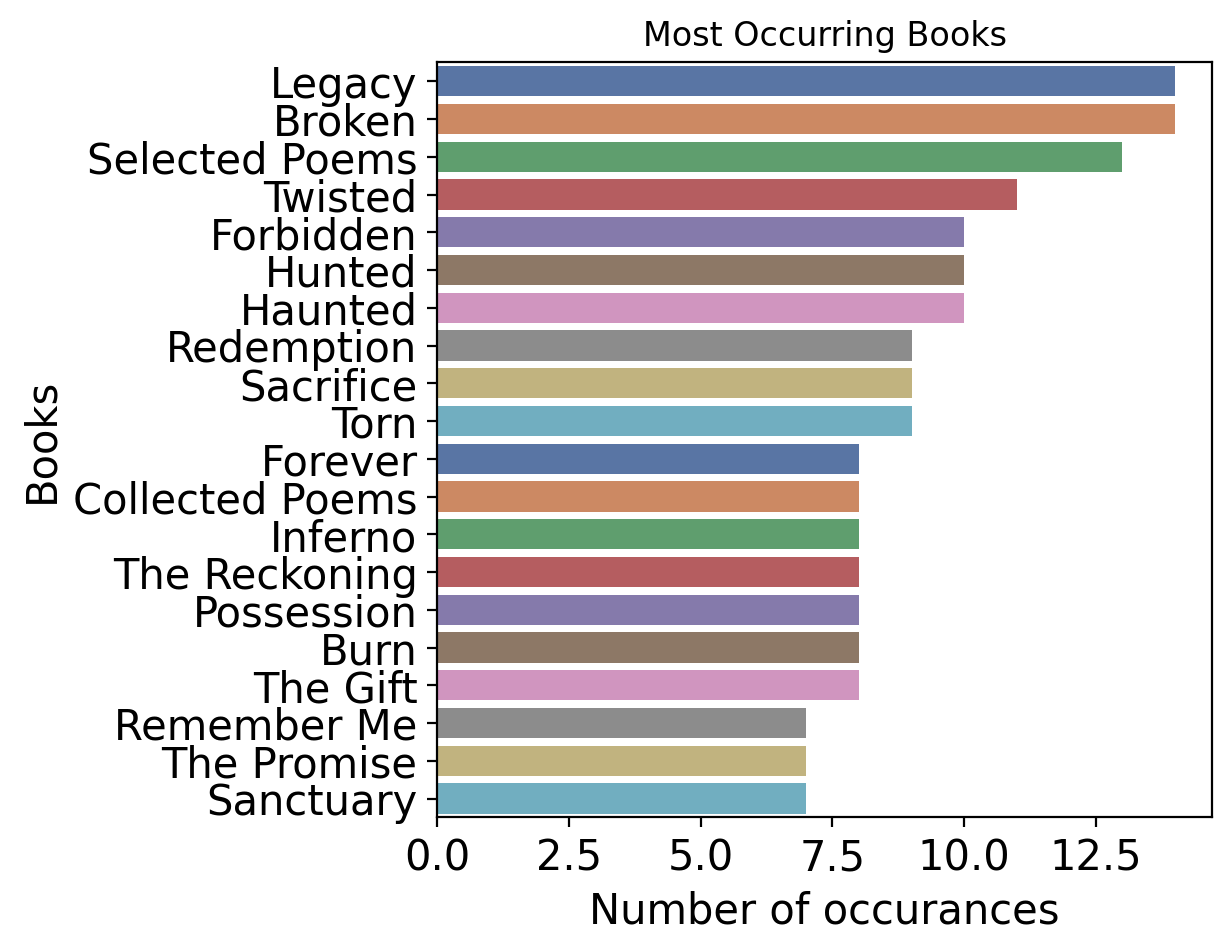

In [16]:
#Taking the first 20:

# sns.set_context('poster')
books = goodreads_books_tags['title'].value_counts()[:20]
rating = goodreads_books_tags.average_rating[:20]
sns.barplot(x=books, y=books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()


#### Finding the top rated books in list

<AxesSubplot:xlabel='rating_count', ylabel='title'>

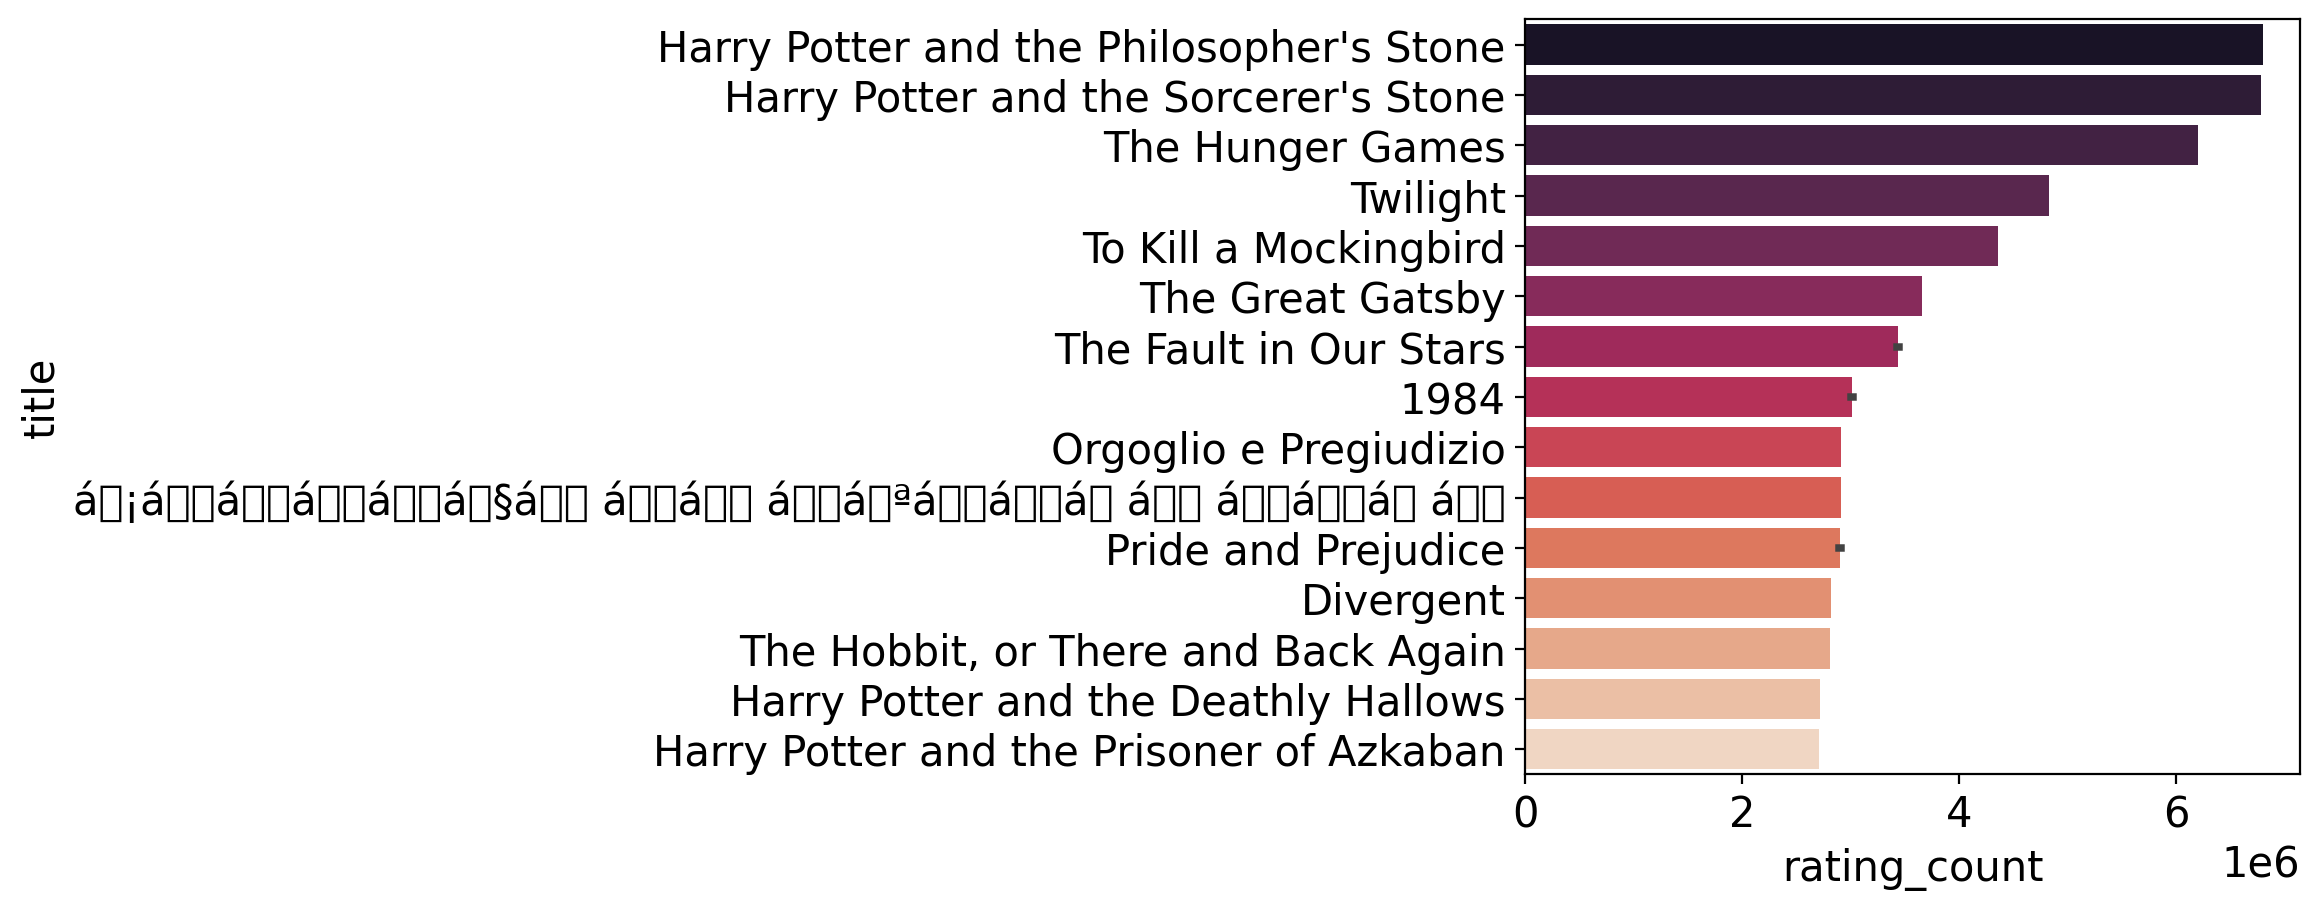

In [17]:
most_rated_books = goodreads_books_tags.sort_values(
    "rating_count", ascending=False).head(20).set_index('title_with_series_name')
# print(most_rated_books['rating_count'])
sns.barplot(most_rated_books['rating_count'], most_rated_books.title, palette='rocket')


#### Finding the authors publishing the most books


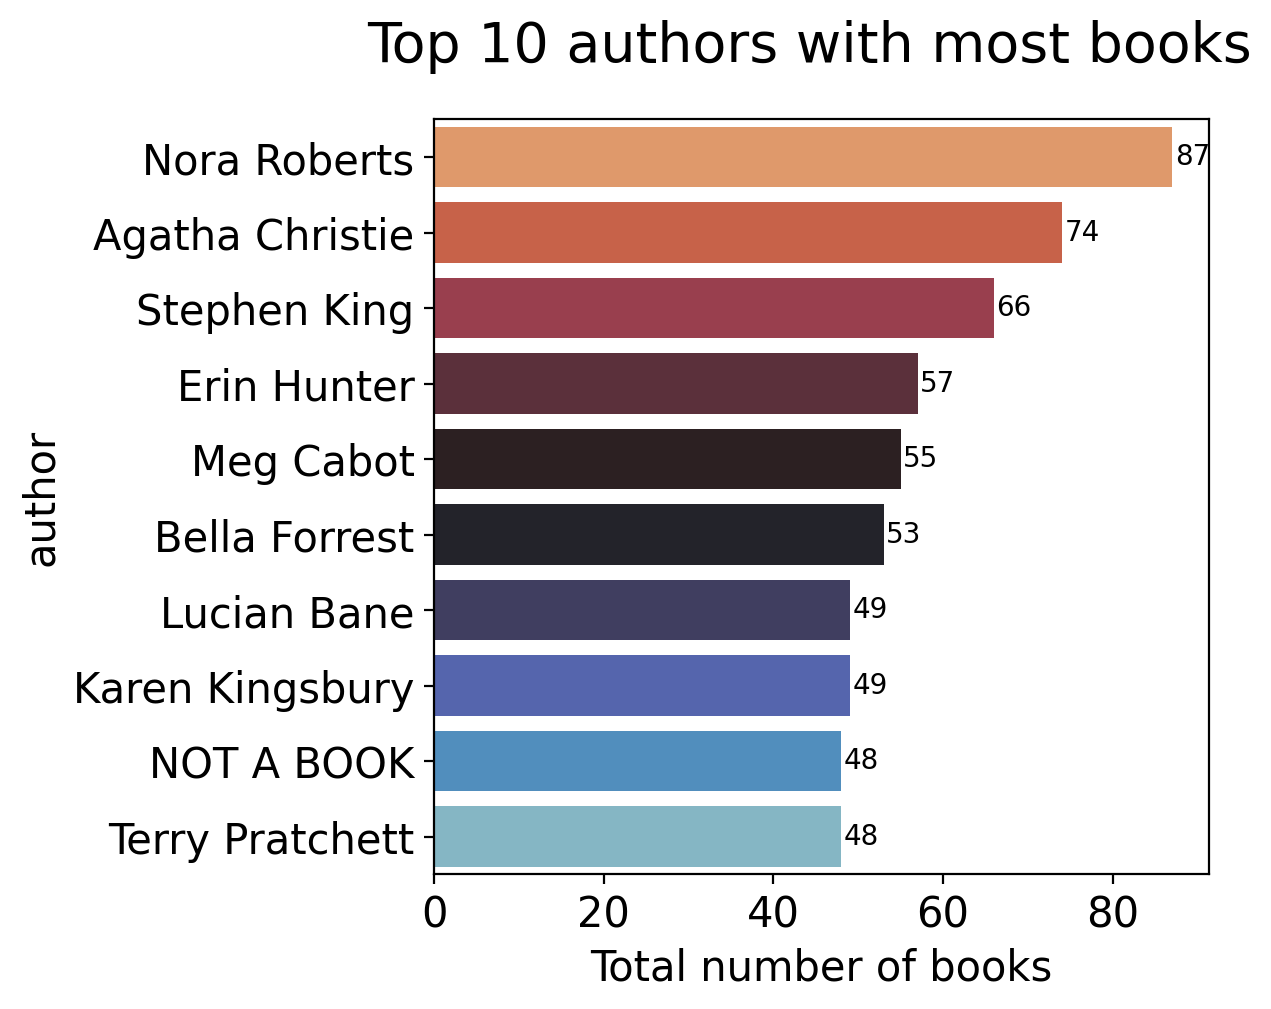

In [18]:
# sns.set_context('talk')

most_books = goodreads_books_tags \
                .groupby('author')['title']\
                .count()\
                .reset_index()\
                .sort_values('title',ascending=False).head(10).set_index('author')
ax = sns.barplot(most_books['title'],most_books.index, palette='icefire_r')
plt.suptitle("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), color='k')

#### Finding Best Author who has written books having best average rating >=4.3 and rating count > 50000

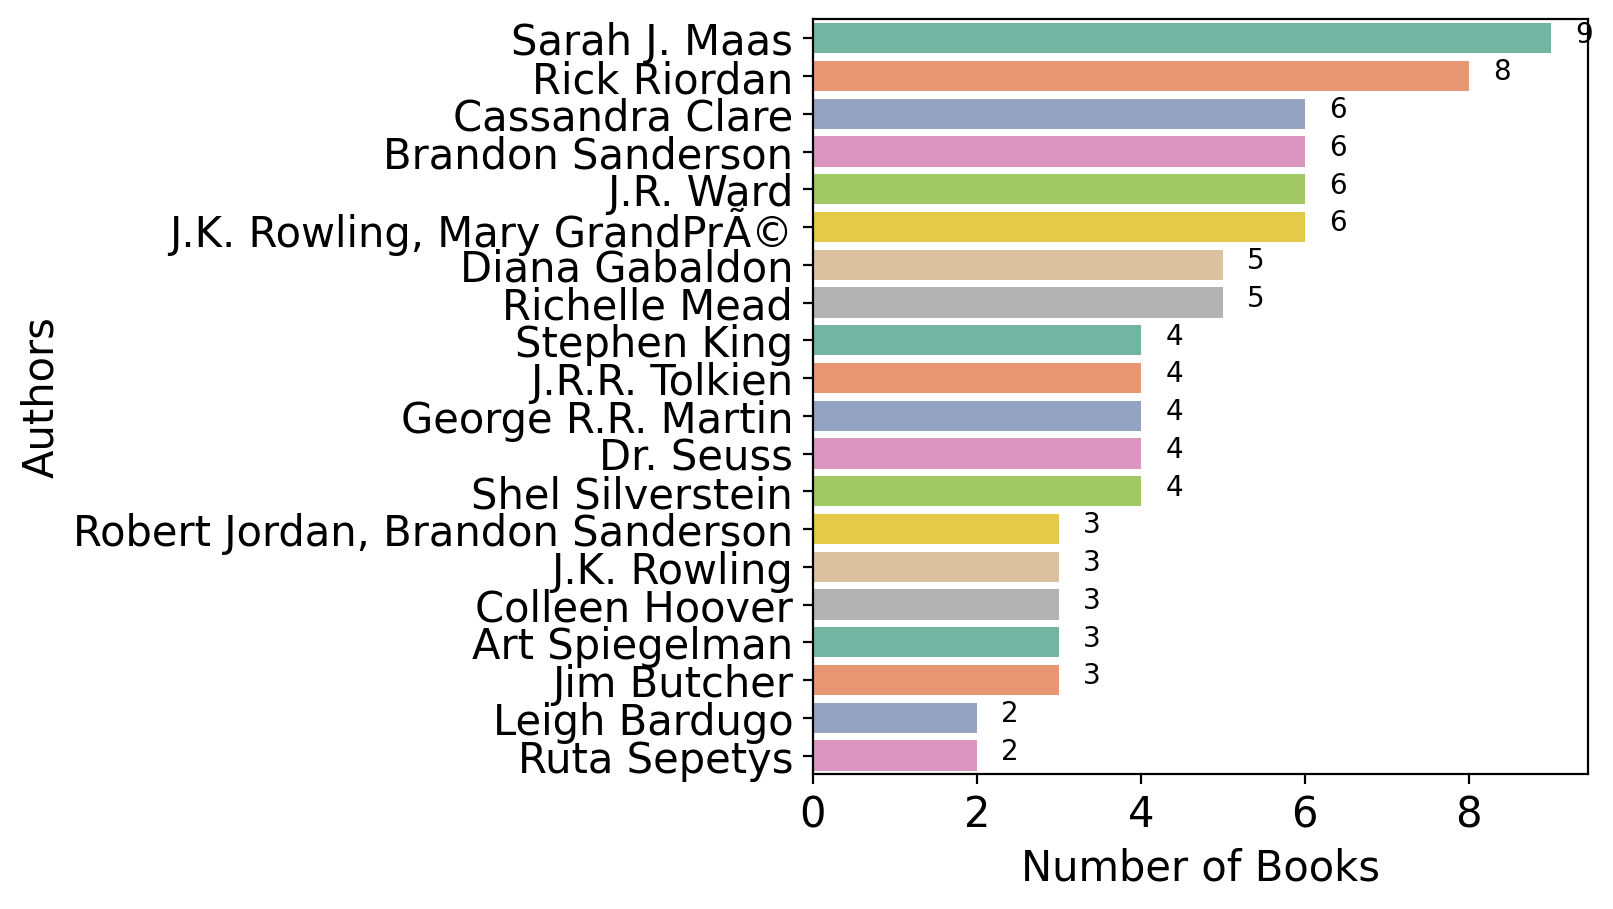

In [19]:
high_rated_author = goodreads_books_tags.loc[(goodreads_books_tags['rating_count'] > 100000) & (goodreads_books_tags['average_rating']
                                                                                               >= 4.3) ]
high_rated_author = high_rated_author.groupby('author')['title'].count(
).reset_index().sort_values('title', ascending=False).head(20).set_index('author')
ax = sns.barplot(high_rated_author['title'],
                 high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5,
            str(round(i.get_width())), color='k')


#### Finding the rating distribution for the books

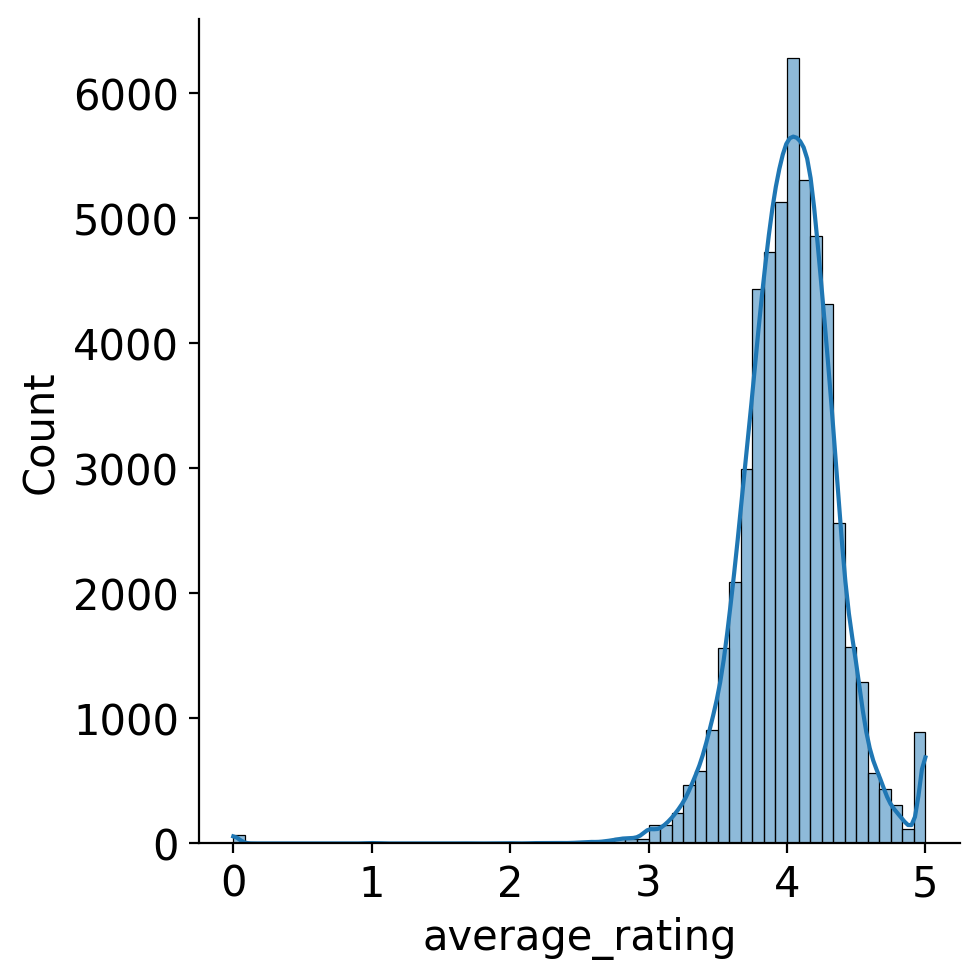

In [20]:
rating = goodreads_books_tags.average_rating.astype(float)
ax = sns.displot(data=goodreads_books_tags, x="average_rating",kde=True, bins=60)

#### Checking for relation between average_rating and review counts

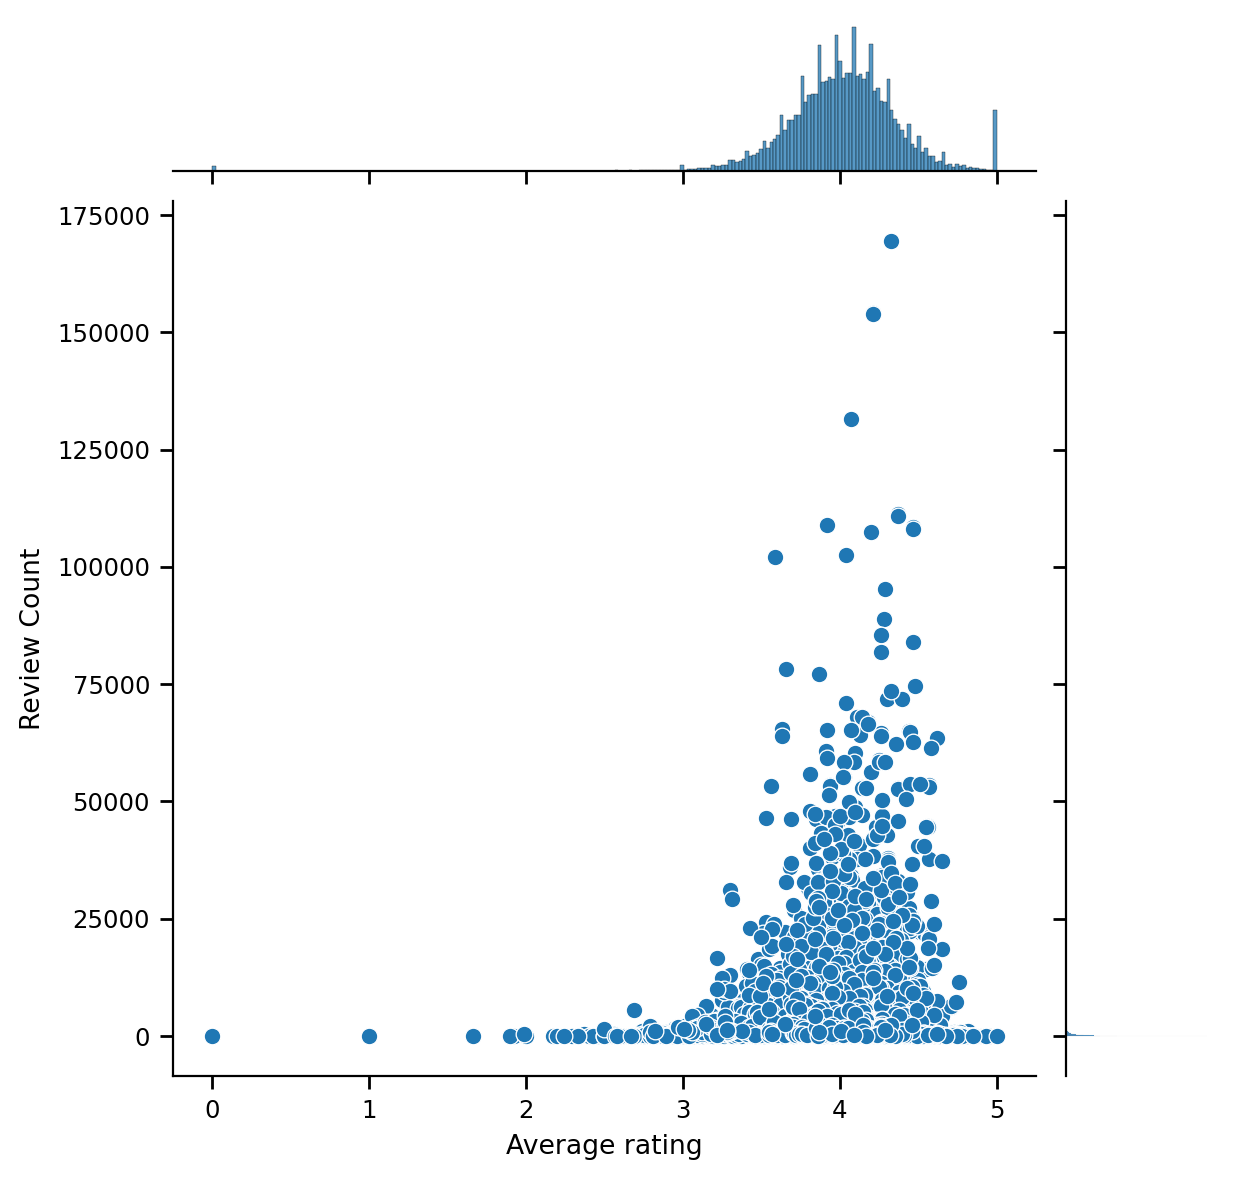

In [21]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="review_count",kind="scatter", data=goodreads_books_tags[['review_count',"average_rating"]]);
ax.set_axis_labels("Average rating","Review Count")
plt.show()

#### Books with most reviews

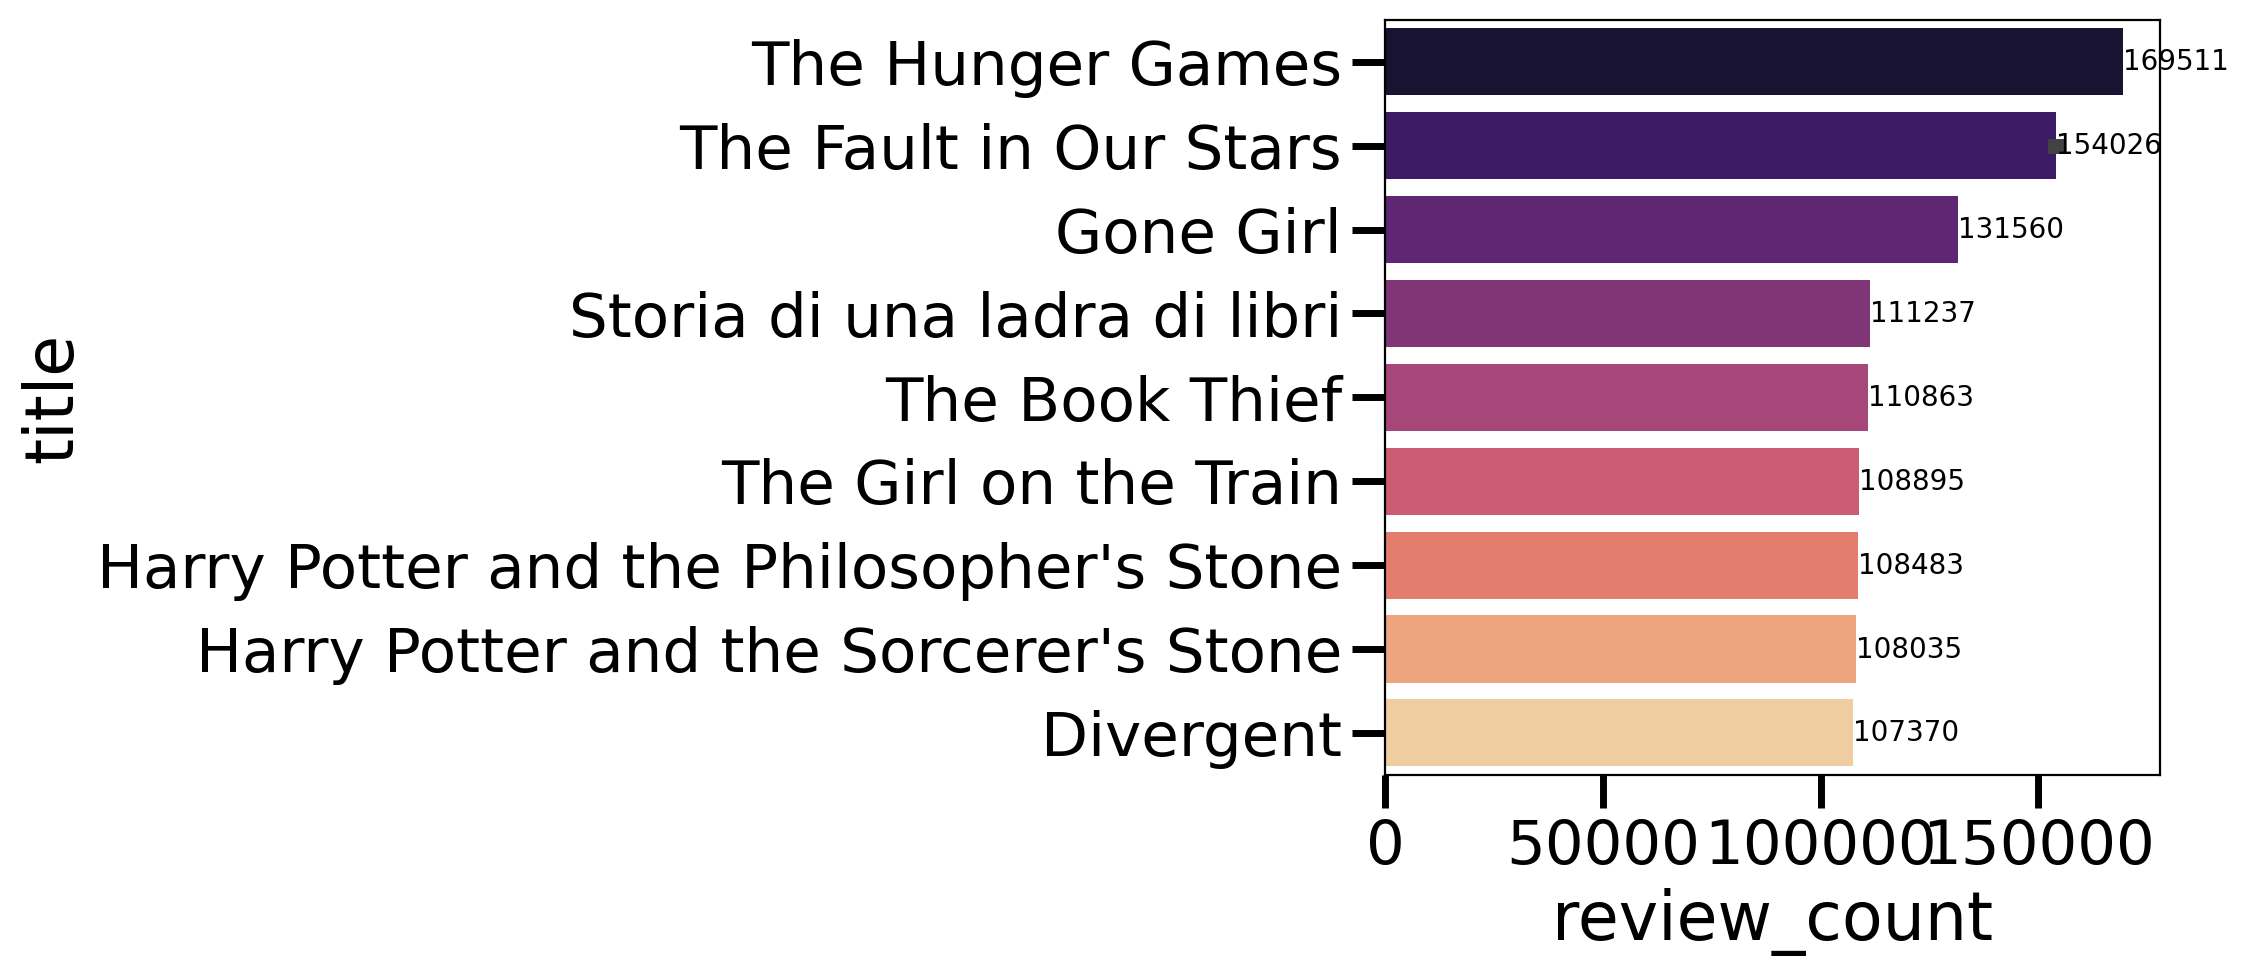

In [22]:
most_reviews = goodreads_books_tags.sort_values("review_count",ascending=False).head(10).set_index('title')

sns.set_context("poster")
ax = sns.barplot(most_reviews['review_count'],most_reviews.index, palette='magma')
for i in ax.patches:
    ax.text(i.get_width()+2, i.get_y()+0.5,str(round(i.get_width())), color="black" )
plt.show()

## Common Funtions Useful for Recommendation Systems


In [23]:
from functools import reduce
from io import BytesIO
from PIL import Image
import requests


def get_index_from_name(dataframe,name):
    return dataframe[dataframe["title"] == name].index.tolist()[0]


def get_id_from_partial_name(dataframe, partial):
    all_books_names = list(dataframe.title.values)
    for name in all_books_names:
        if partial in name:
            print(name, all_books_names.index(name))


def print_format(dataframe, id):
    return ", ".join(reduce(
        lambda acc, prop:
        acc if dataframe.iloc[id][prop] == "" else acc + [str(f'{prop}: {dataframe.iloc[id][prop]}')], ['title', 'series', 'author'], []))

def print_cover_image(url, title="no title"):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20, 2))
    plt.grid(False)
    plt.axis('off')
    plt.title(title)
    print(plt.imshow(img))


## Recommendation System With K Nearest Neighbours

#### Discritizing average_rating column

In [24]:
goodreads_books_tags_2 = goodreads_books_tags.copy()

goodreads_books_tags_2.loc[(goodreads_books_tags_2['average_rating'] >= 0) & (goodreads_books_tags_2['average_rating'] <= 1),
        'rating_between'] = "between 0 and 1"
goodreads_books_tags_2.loc[(goodreads_books_tags_2['average_rating'] > 1) & (goodreads_books_tags_2['average_rating'] <= 2),
        'rating_between'] = "between 1 and 2"
goodreads_books_tags_2.loc[(goodreads_books_tags_2['average_rating'] > 2) & (goodreads_books_tags_2['average_rating'] <= 3),
        'rating_between'] = "between 2 and 3"
goodreads_books_tags_2.loc[(goodreads_books_tags_2['average_rating'] > 3) & (goodreads_books_tags_2['average_rating'] <= 4),
        'rating_between'] = "between 3 and 4"
goodreads_books_tags_2.loc[(goodreads_books_tags_2['average_rating'] > 4) & (goodreads_books_tags_2['average_rating'] <= 5),
        'rating_between'] = "between 4 and 5"


goodreads_books_tags_2.head()


goodreads_book_id                                              title  \
0            630104                                       Inner Circle   
1              9487                                  A Time to Embrace   
2           6050894                                           Take Two   
3             39030                                          Reliquary   
4               998  The Millionaire Next Door: The Surprising Secr...   

                series                                         cover_link  \
0         (Private #5)  https://i.gr-assets.com/images/S/compressed.ph...   
1   (Timeless Love #2)  https://i.gr-assets.com/images/S/compressed.ph...   
2  (Above the Line #2)  https://i.gr-assets.com/images/S/compressed.ph...   
3      (Pendergast #2)  https://i.gr-assets.com/images/S/compressed.ph...   
4                       https://i.gr-assets.com/images/S/compressed.ph...   

                                author  rating_count  review_count  \
0            Kate Brian, Julian Peploe        7597.0         196.0   
1                      Karen Kingsbury        4179.0         177.0   
2                      Karen Kingsbury        6288.0         218.0   
3       Douglas Preston, Lincoln Child       38382.0        1424.0   
4  Thomas J. Stanley, William D. Danko       72168.0        3217.0   

   average_rating  five_star_ratings  four_star_ratings  three_star_ratings  \
0            4.03             3045.0             2323.0              1748.0   
1            4.35             2255.0             1290.0               518.0   
2            4.23             3000.0             2020.0              1041.0   
3            4.01            12711.0            15407.0              8511.0   
4            4.04            27594.0            25219.0             14855.0   

   two_star_ratings  one_star_ratings   tag_id    count tag_name  \
0             389.0              92.0  30574.0  52199.0  to-read   
1              93.0              23.0  30574.0  52199.0  to-read   
2             183.0              44.0  30574.0  52199.0  to-read   
3            1429.0             324.0  30574.0  52199.0  to-read   
4            3414.0            1086.0  30574.0  52199.0  to-read   

                              title_with_series_name   rating_between  
0  Inner Circle, (Private #5), Kate Brian, Julian...  between 4 and 5  
1  A Time to Embrace, (Timeless Love #2), Karen K...  between 4 and 5  
2     Take Two, (Above the Line #2), Karen Kingsbury  between 4 and 5  
3  Reliquary, (Pendergast #2), Douglas Preston, L...  between 4 and 5  
4  The Millionaire Next Door: The Surprising Secr...  between 4 and 5

#### Converting the discretized average rating columns into features

In [25]:
books_features = pd.concat([goodreads_books_tags_2['rating_between'].str.get_dummies(
    sep=","), goodreads_books_tags_2['average_rating'], goodreads_books_tags_2['rating_count']], axis=1)

books_features.head()


between 0 and 1  between 1 and 2  between 2 and 3  between 3 and 4  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   between 4 and 5  average_rating  rating_count  
0                1            4.03        7597.0  
1                1            4.35        4179.0  
2                1            4.23        6288.0  
3                1            4.01       38382.0  
4                1            4.04       72168.0

#### Scaling down the average rating columns features to a fixed range

In [26]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)
np.round(books_features, 2)


array([[0.  , 0.  , 0.  , ..., 1.  , 0.81, 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.87, 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.85, 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 1.  , 0.83, 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.82, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.66, 0.  ]])

#### Applying K nearest neighbours algorithm where K = 6

In [27]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)


In [28]:
def print_similar_books(query=None, id=None):
    if id:
        for id in indices[id][1:]:
            print_cover_image(goodreads_books_tags_2.iloc[id]['cover_link'], print_format(
                goodreads_books_tags_2, id))
    if query:
        found_id = get_index_from_name(goodreads_books_tags_2,query)
        for id in indices[found_id][1:]:
            print_cover_image(goodreads_books_tags_2.iloc[id]['cover_link'], print_format(
                goodreads_books_tags_2, id))


#### Evaluating Books Recommended for Stardust by Neil Gailman

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


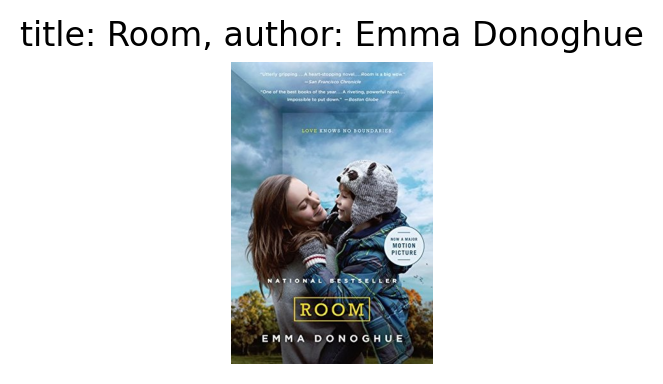

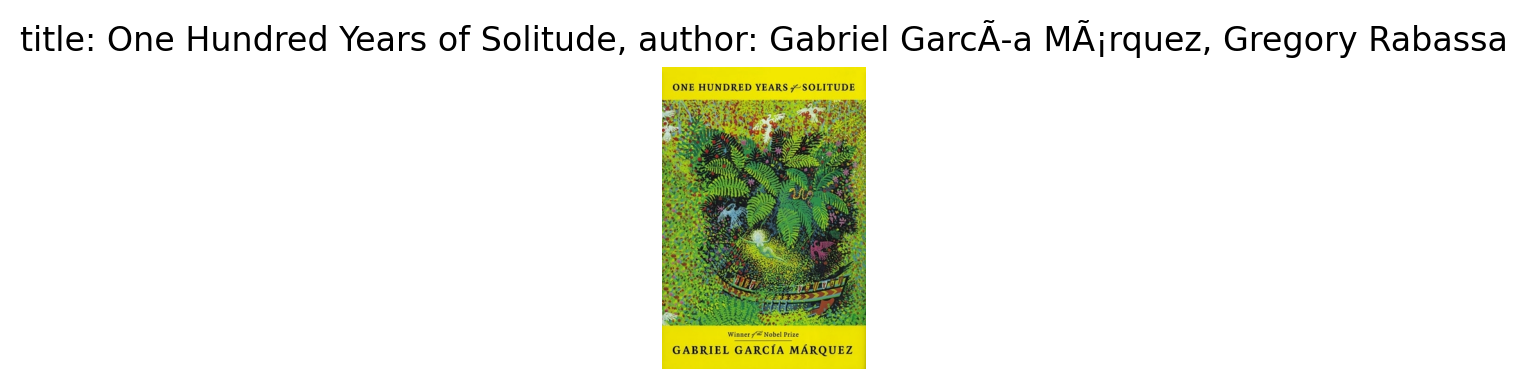

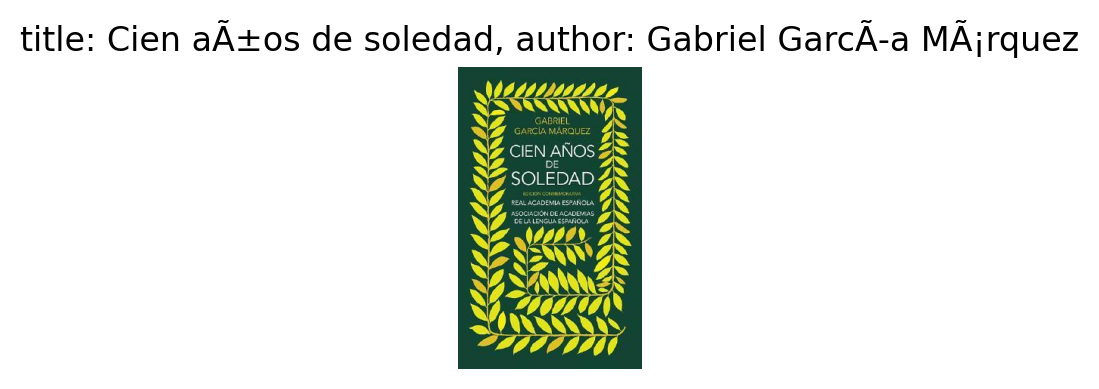

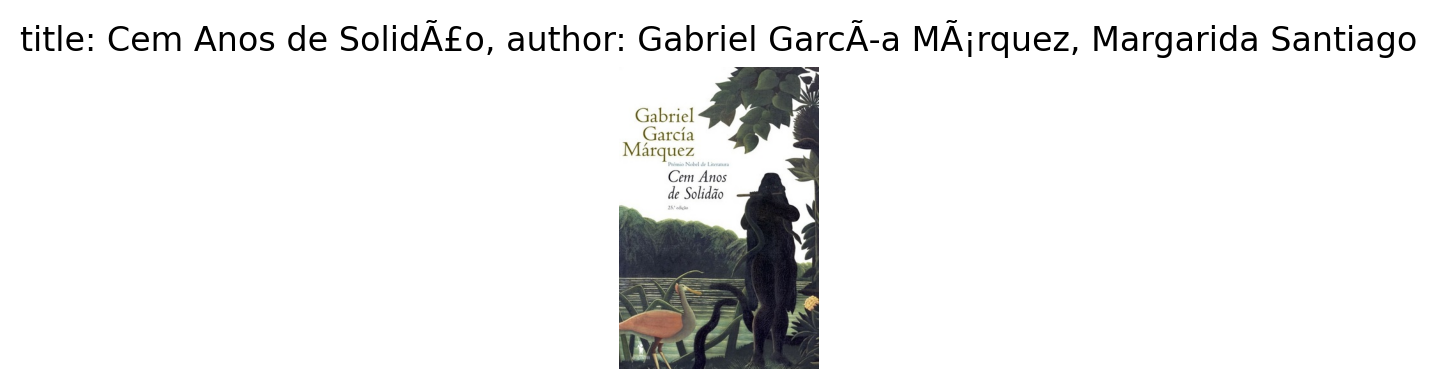

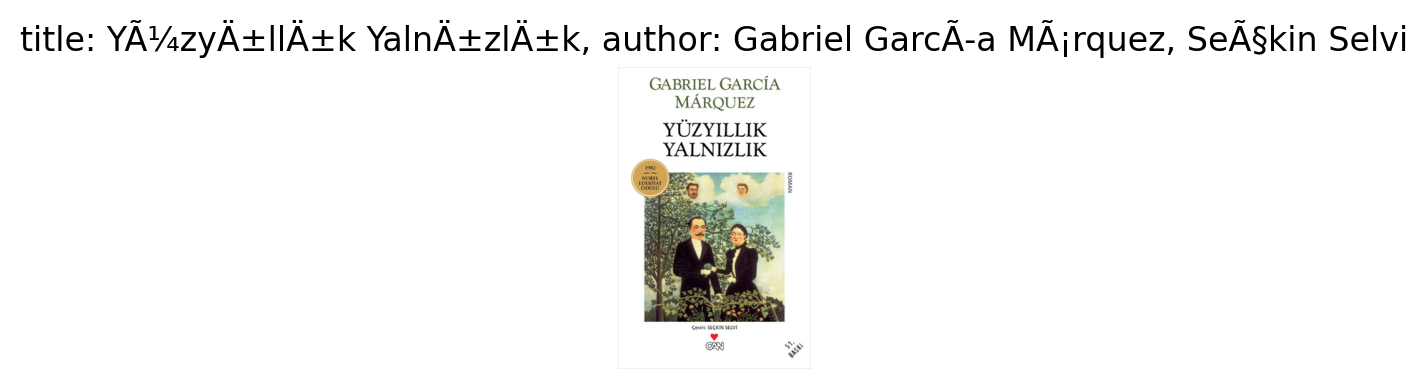

In [29]:
print_similar_books("Stardust")


#### Evaluating Books Recommended for Book titled <em>Room</em>

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


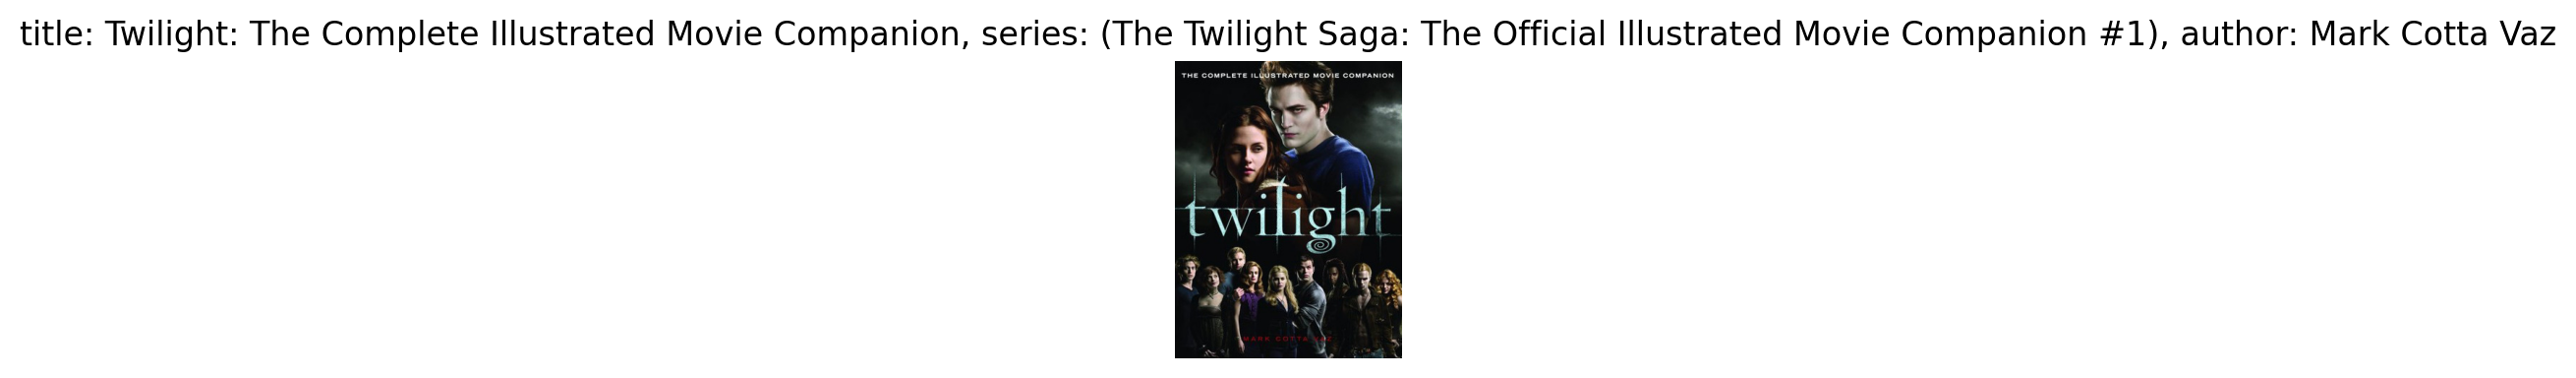

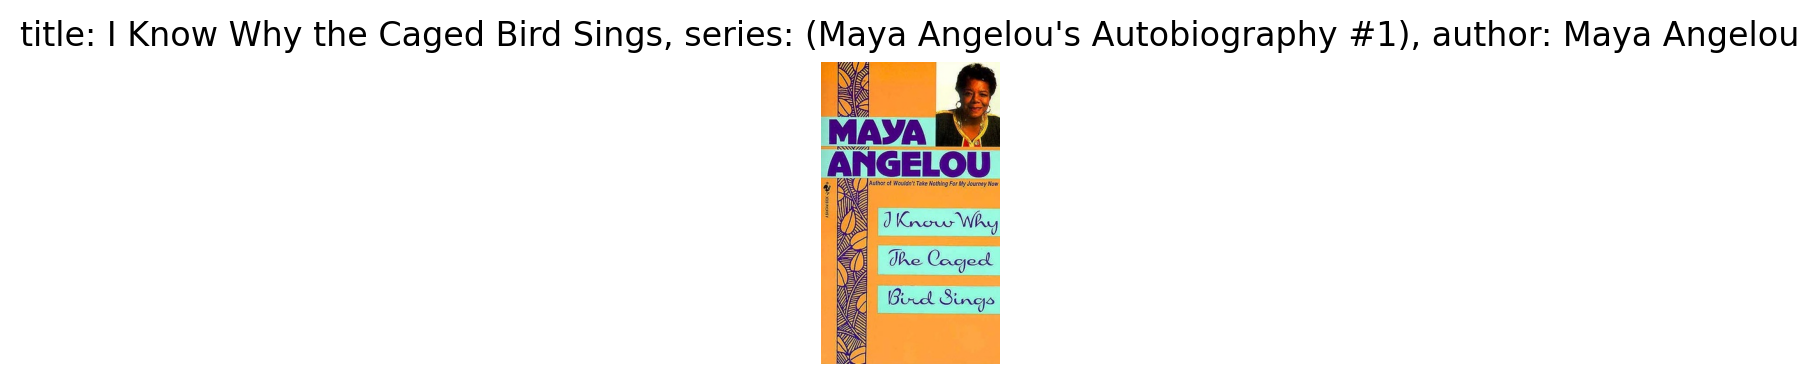

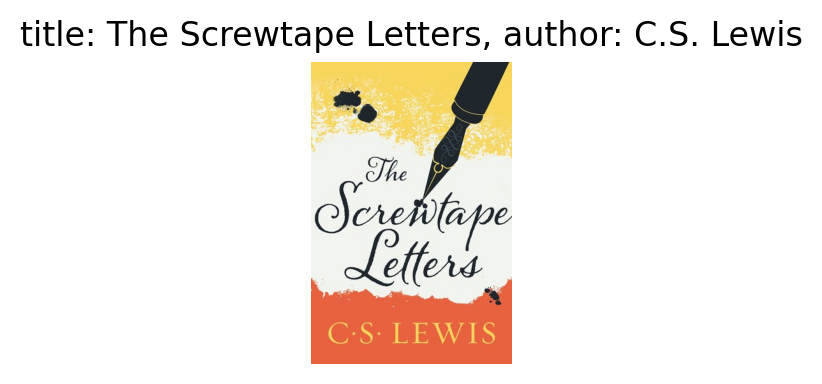

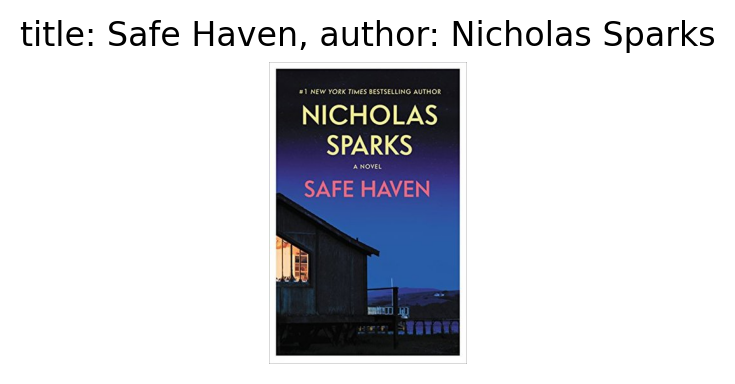

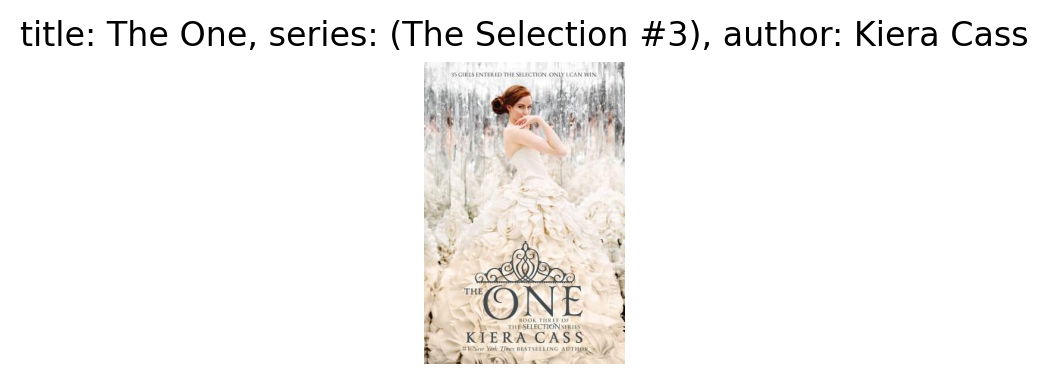

In [30]:
print_similar_books("Room")


## Recommendation System with 1R Classifier

#### Viewing the values of the Stardust Book

In [31]:
selected_book = goodreads_books_tags[goodreads_books_tags["title"] == "Stardust"]

# to print the table vertically
selected_book.T

41860
goodreads_book_id                                                   16793
title                                                            Stardust
series                                                                   
cover_link              https://i.gr-assets.com/images/S/compressed.ph...
author                                                        Neil Gaiman
rating_count                                                     346051.0
review_count                                                      17981.0
average_rating                                                       4.09
five_star_ratings                                                130605.0
four_star_ratings                                                135308.0
three_star_ratings                                                63731.0
two_star_ratings                                                  12469.0
one_star_ratings                                                   3938.0
tag_id                                                            30574.0
count                                                            177061.0
tag_name                                                          to-read
title_with_series_name                            Stardust, , Neil Gaiman

#### Recommending based on average rating greater than or equal to the book selected

In [32]:
def get_books_average_rating_greater_than(selected_book_name):
    selected_book_row = goodreads_books_tags[goodreads_books_tags["title"]
                                             == selected_book_name ]
    return goodreads_books_tags[(goodreads_books_tags["average_rating"]
                                >= selected_book_row.average_rating.values[0]) & (goodreads_books_tags["title"]
                                != selected_book_row.title.values[0])]


recommended_books_stardust = get_books_average_rating_greater_than(
    "Stardust").sample(5)

recommended_books_room = get_books_average_rating_greater_than("Room").sample(5)



##### Stardust Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


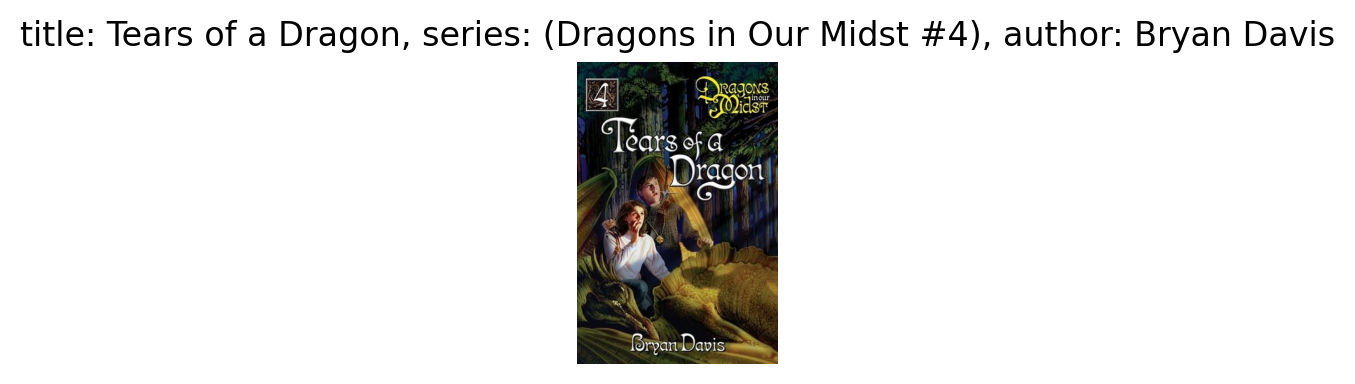

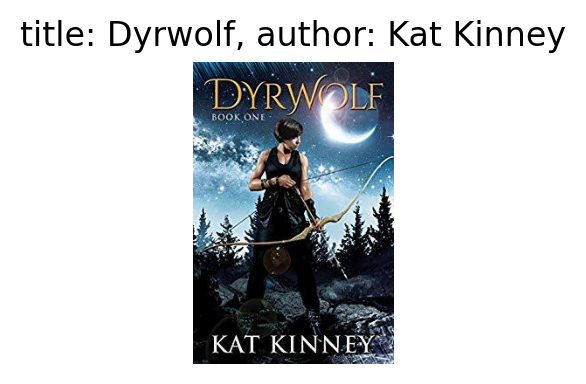

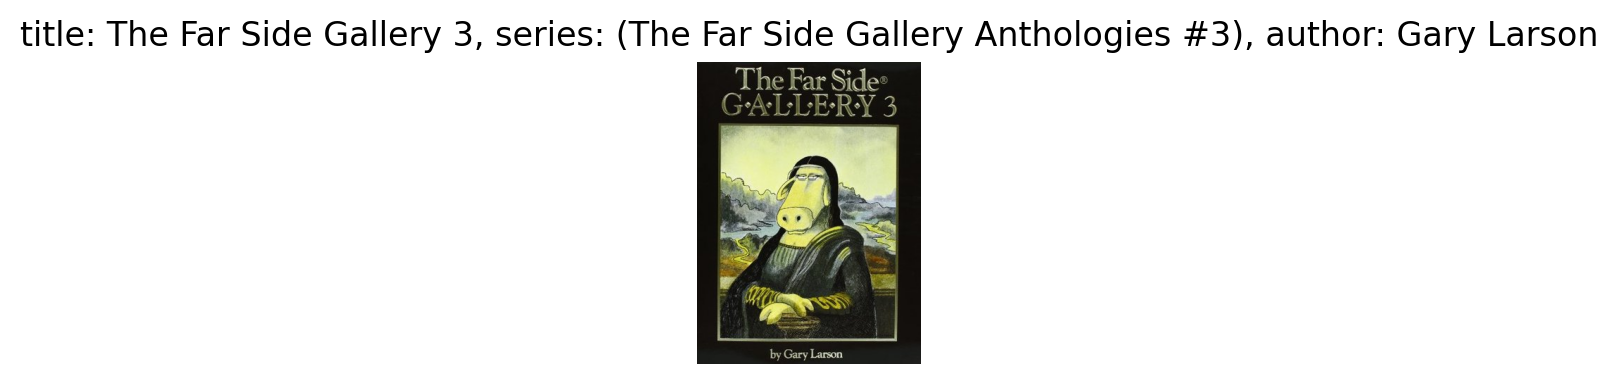

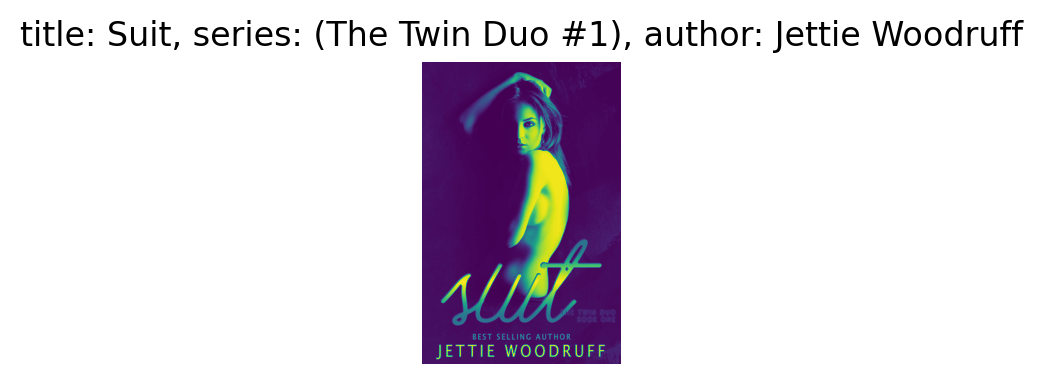

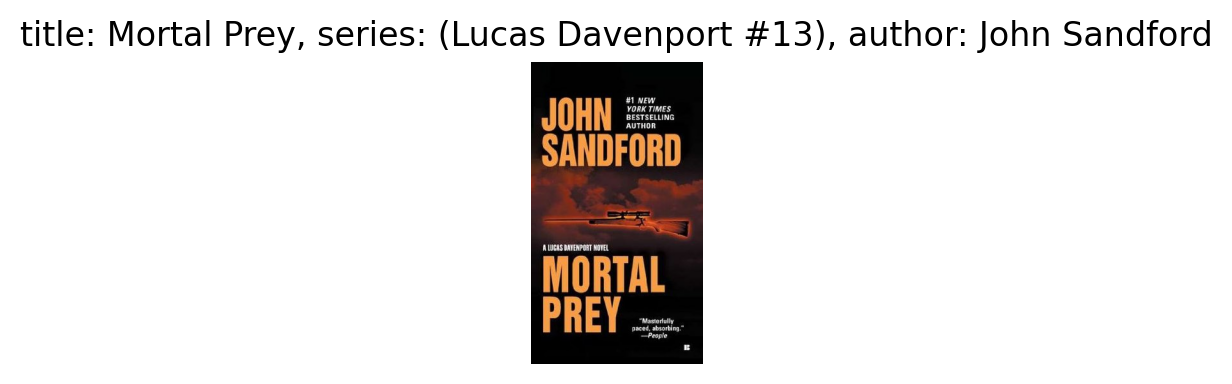

In [33]:
for id in recommended_books_stardust.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))

##### Room Book Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


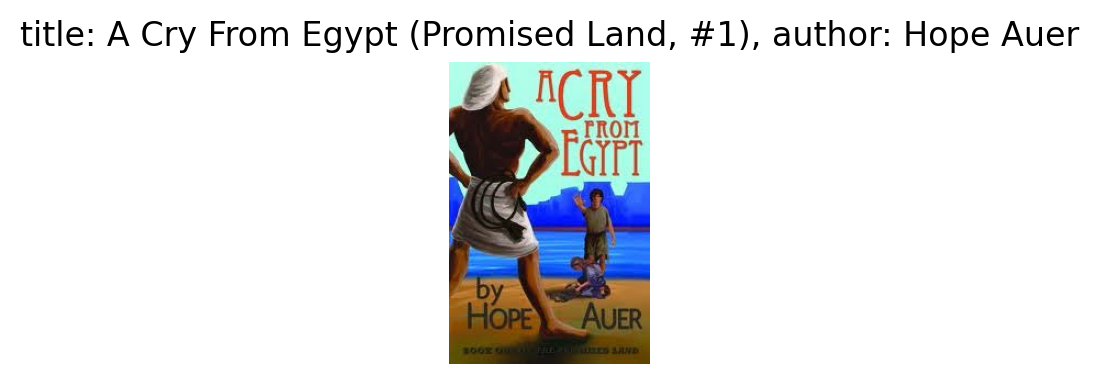

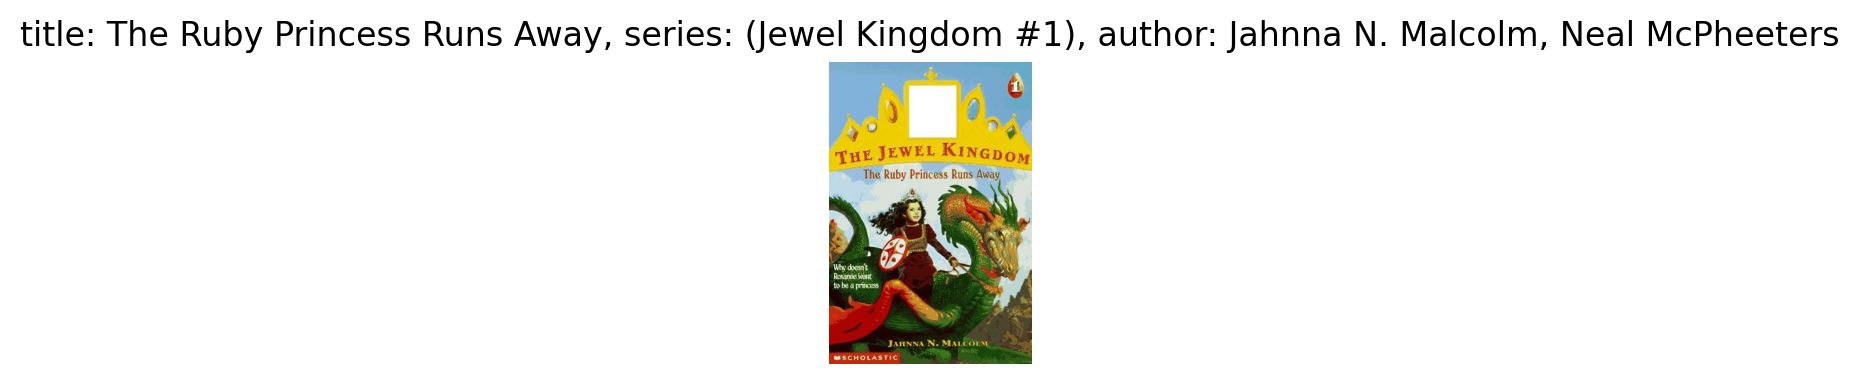

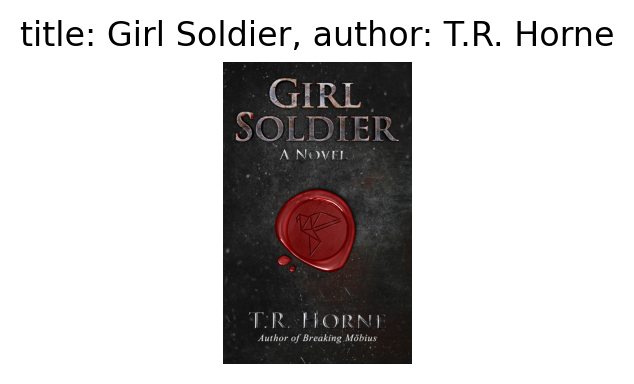

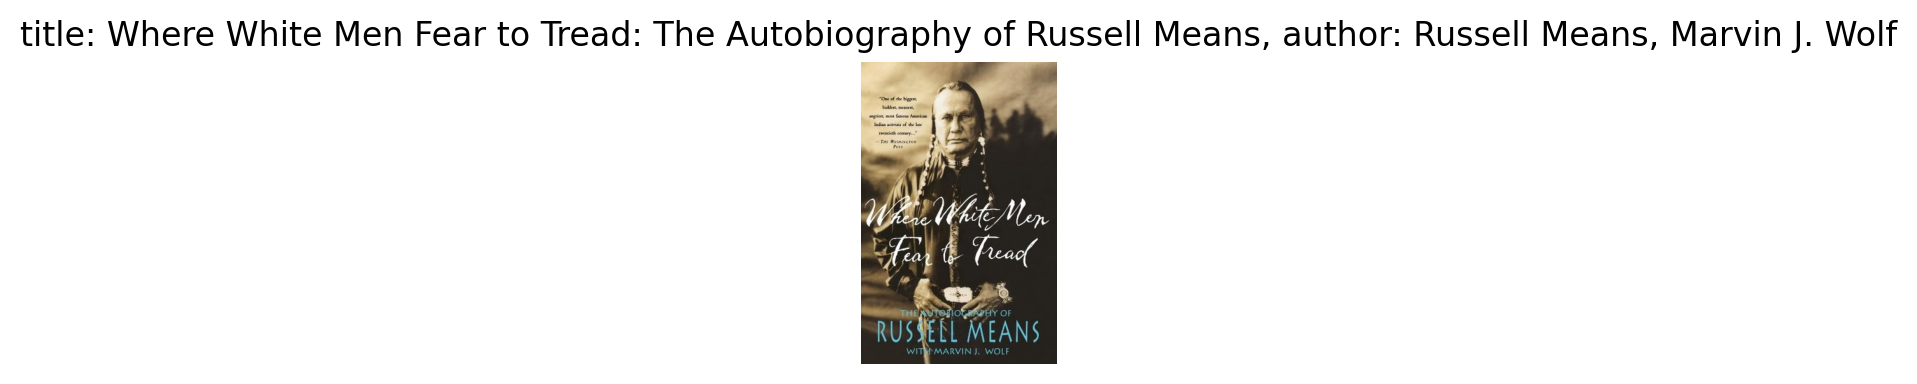

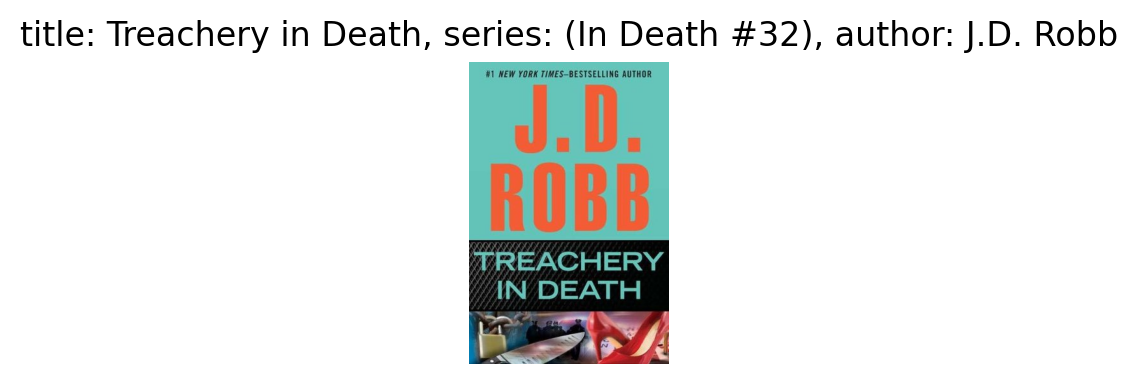

In [34]:
for id in recommended_books_room.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))


#### Recommending Books based on author of the book selected

In [35]:
def get_books_with_same_author(selected_book_name):
    selected_book_row = goodreads_books_tags[goodreads_books_tags["title"]
                                             == selected_book_name]
    return goodreads_books_tags[(goodreads_books_tags["author"]
                                == selected_book_row.author.values[0]) & (goodreads_books_tags["title"]
                                != selected_book_row.title.values[0])]


recommended_books_stardust = get_books_with_same_author("Stardust").sample(5)
recommended_books_room = get_books_with_same_author("Room").sample()


# print("Star dust recommendations: ")
# for id in recommended_books_stardust.index:
#     print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
#         goodreads_books_tags, id))


##### Stardust Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


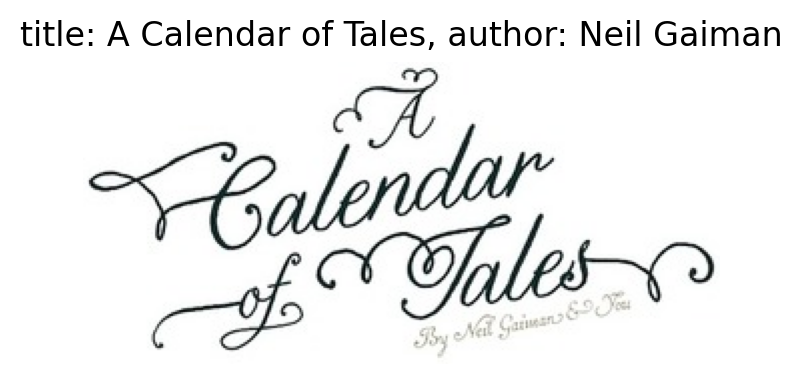

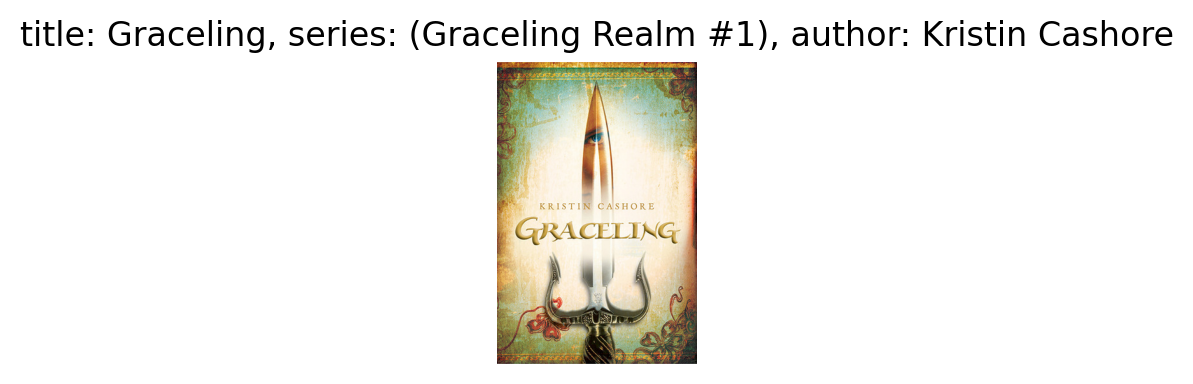

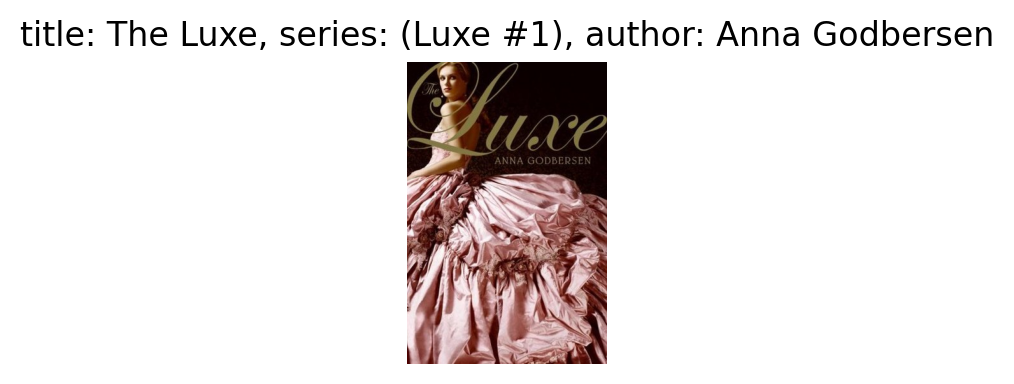

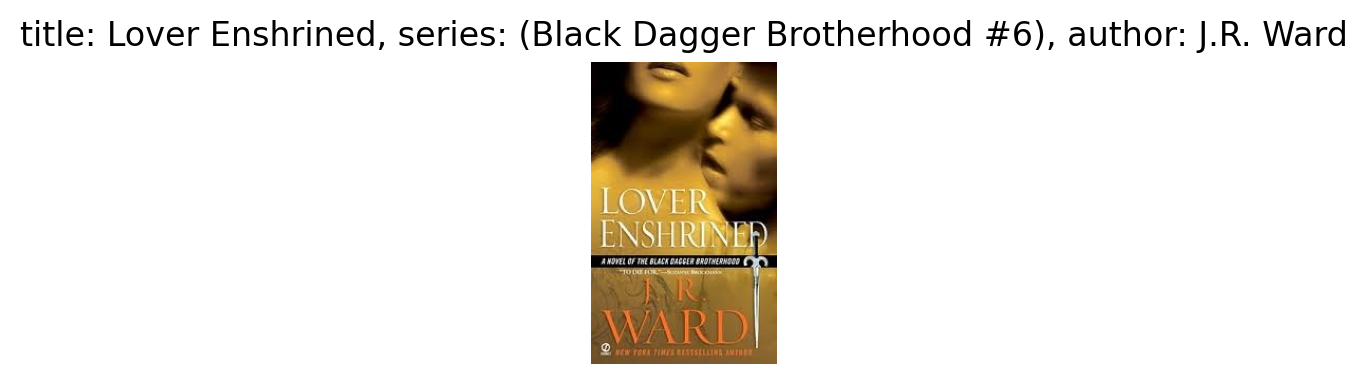

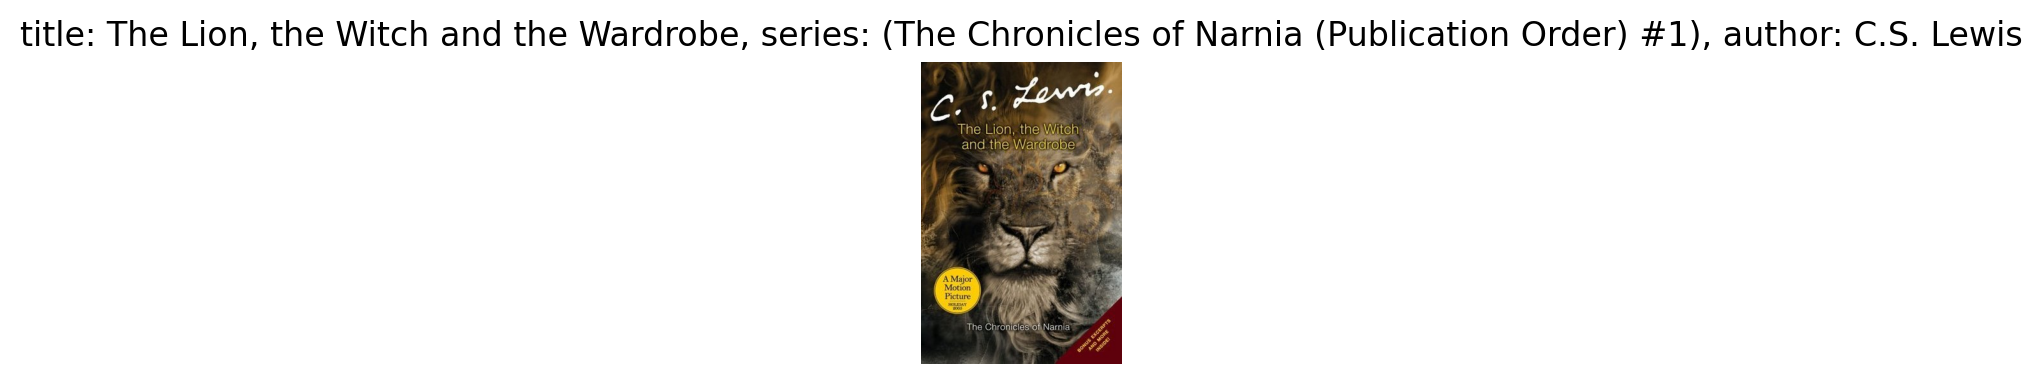

In [36]:
for id in recommended_books_stardust.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))

##### Room Book Recommendation

AxesImage(500,50;3100x302)


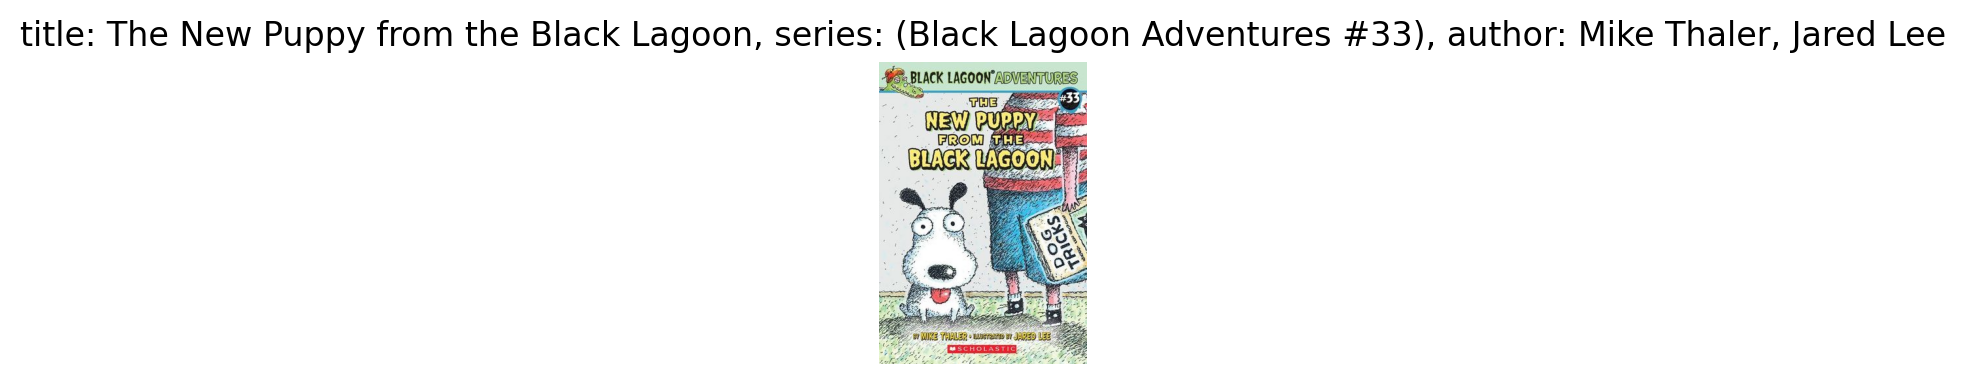

In [37]:
for id in recommended_books_room.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))


#### Recommending Books Based on tag name of the selected Books

In [38]:
def get_books_same_tag_name(selected_book_name):
    selected_book_row = goodreads_books_tags[goodreads_books_tags["title"]
                                             == selected_book_name]
    return goodreads_books_tags[(goodreads_books_tags["tag_name"]
                                == selected_book_row.tag_name.values[0]) & (goodreads_books_tags["title"]
                                != selected_book_row.title.values[0])]


recommended_books_stardust = get_books_same_tag_name(
    "Stardust").sample(5)
recommended_books_room = get_books_same_tag_name("Room").sample(5)


# print("Star dust recommendations: ",recommended_books_stardust['title'].values)
# print("Room recommendations: ",recommended_books_room['title'].values)



##### Stardust Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


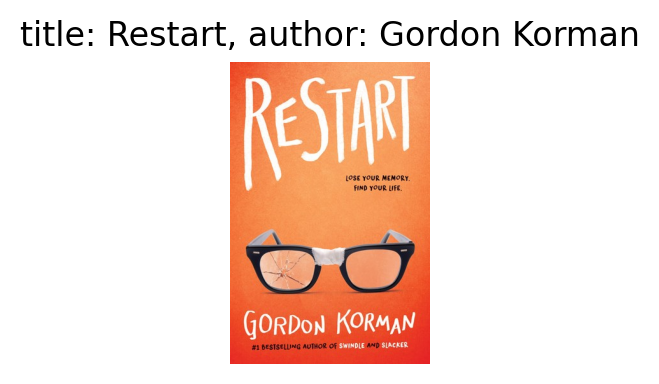

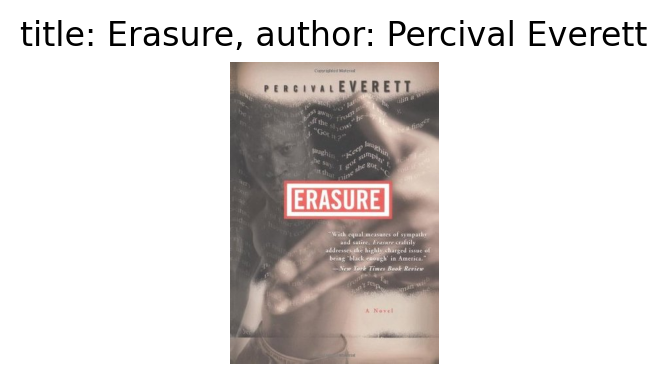

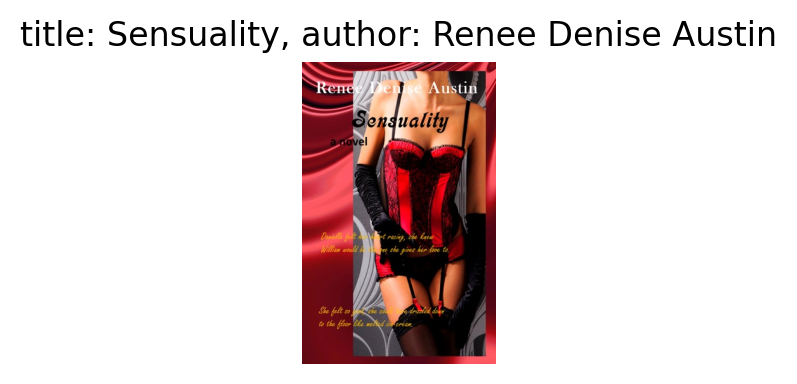

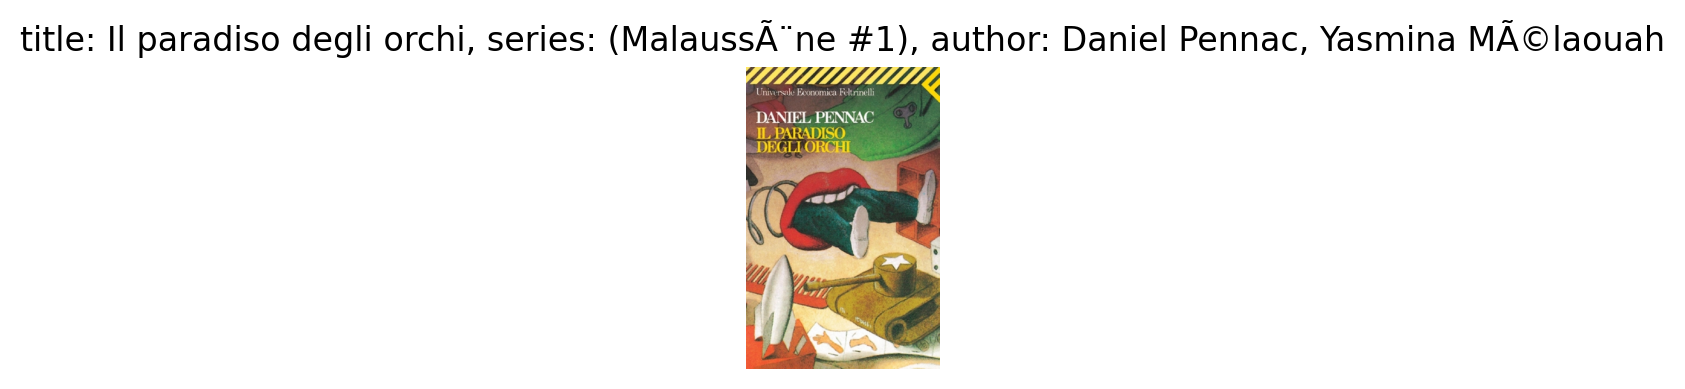

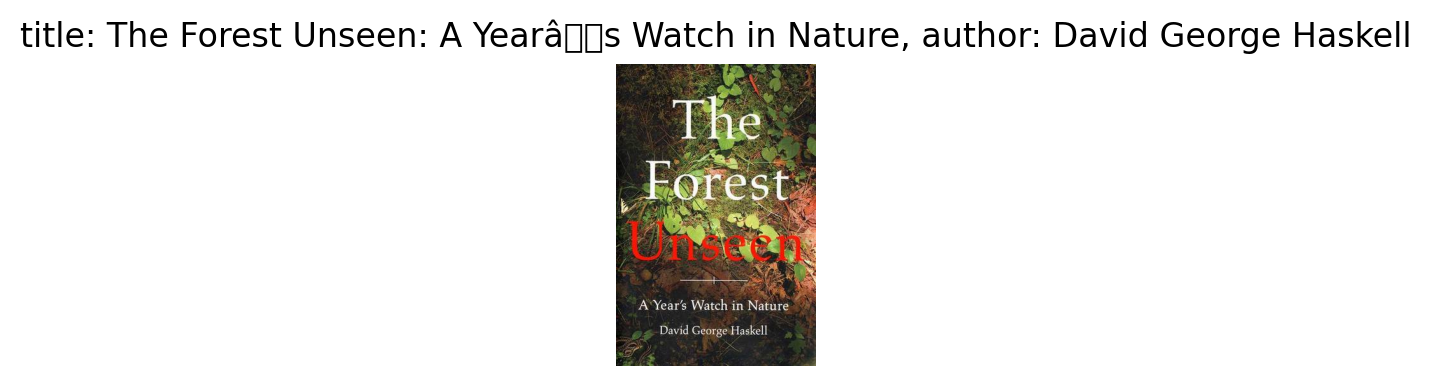

In [39]:
for id in recommended_books_stardust.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))

##### Room Book Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


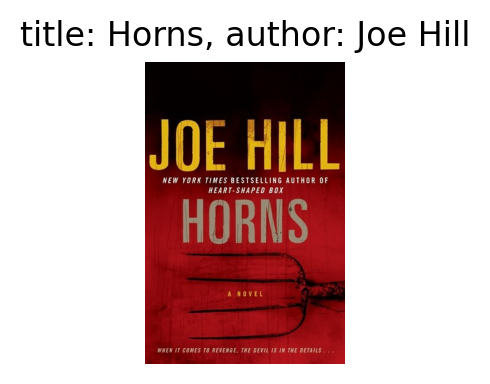

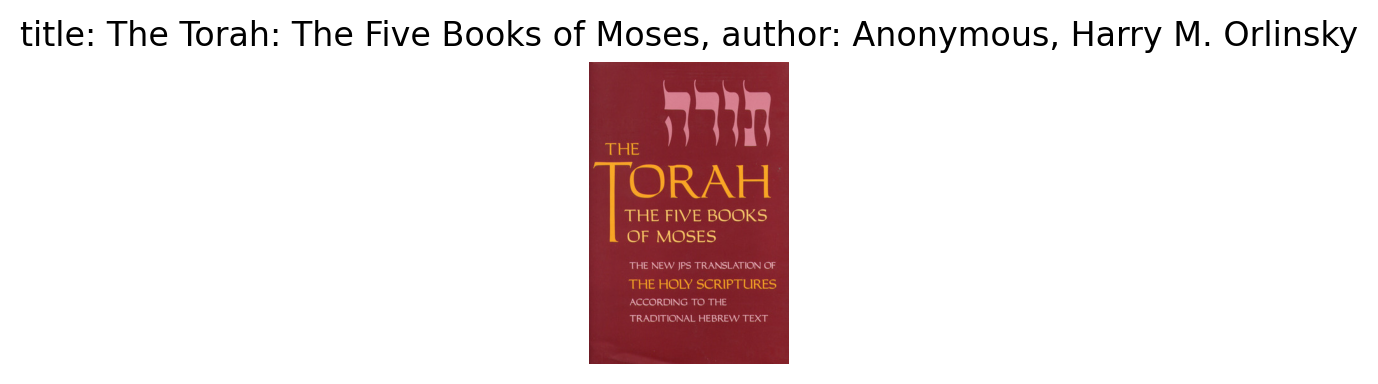

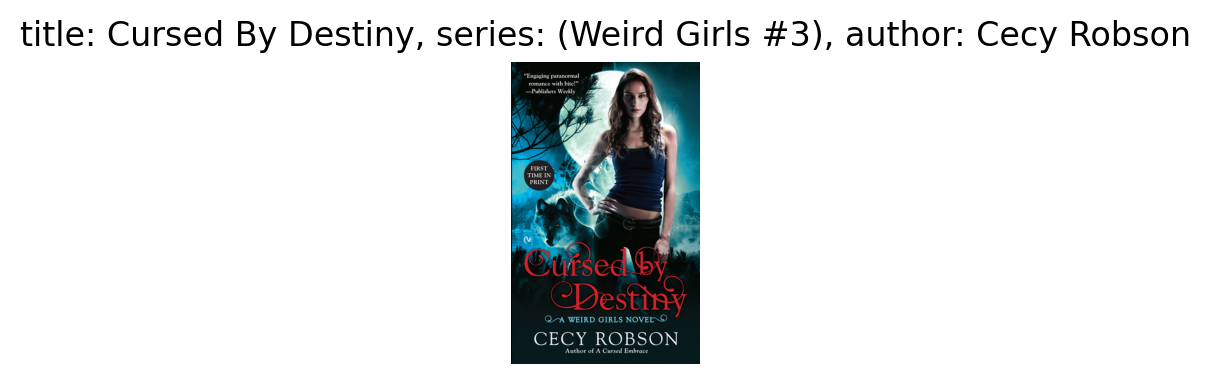

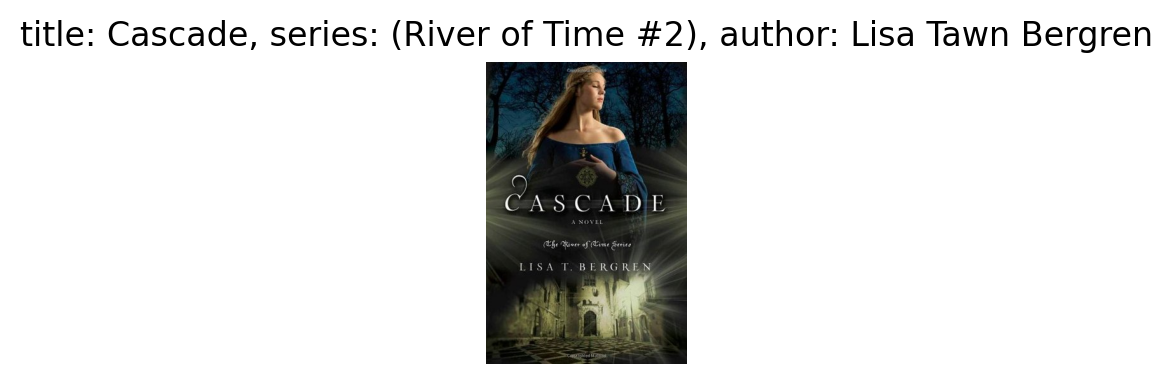

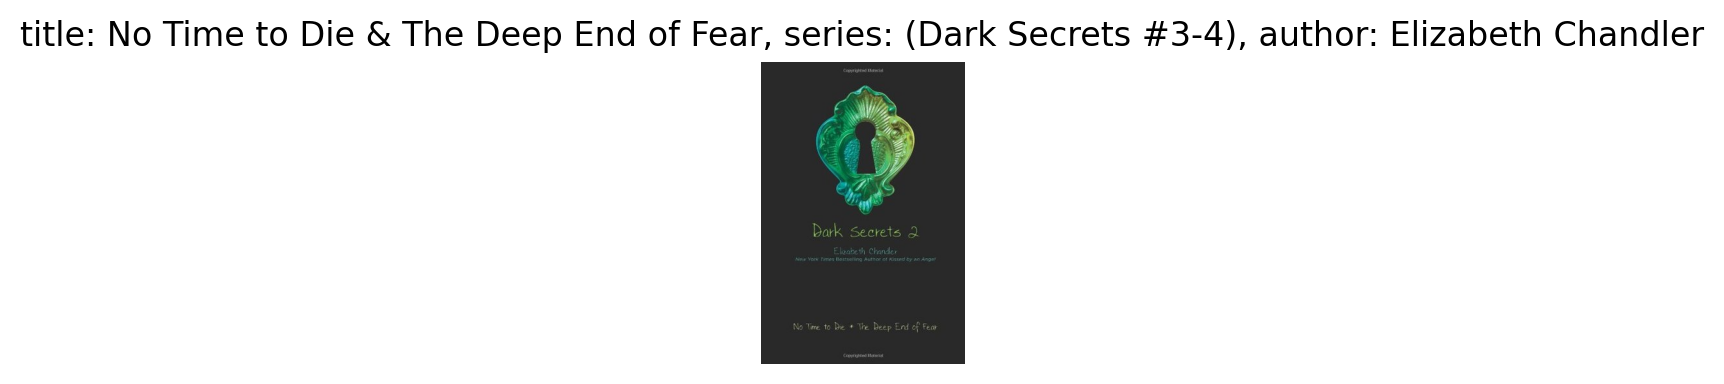

In [40]:
for id in recommended_books_room.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))


#### Recommending Books based on review count of the selected Book

In [41]:
def get_books_by_review_count(selected_book_name):
    selected_book_row = goodreads_books_tags[goodreads_books_tags["title"]
                                             == selected_book_name]
    return goodreads_books_tags[(goodreads_books_tags["review_count"]
                                >= selected_book_row.review_count.values[0]) & (goodreads_books_tags["title"]
                                != selected_book_row.title.values[0])]


recommended_books_stardust = get_books_by_review_count(
    "Stardust").sample(5)
recommended_books_room = get_books_by_review_count("Room").sample(5)


# print("Star dust recommendations: ",
#       recommended_books_stardust['title'].values)
# print("Room recommendations: ", recommended_books_room['title'].values)


##### Stardust Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


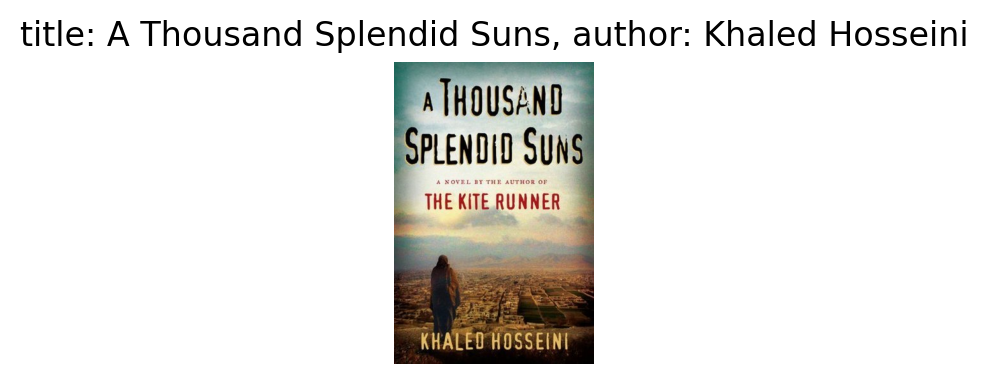

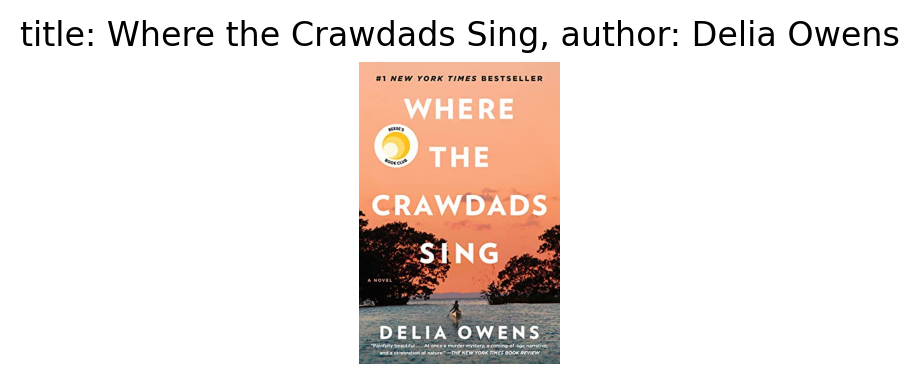

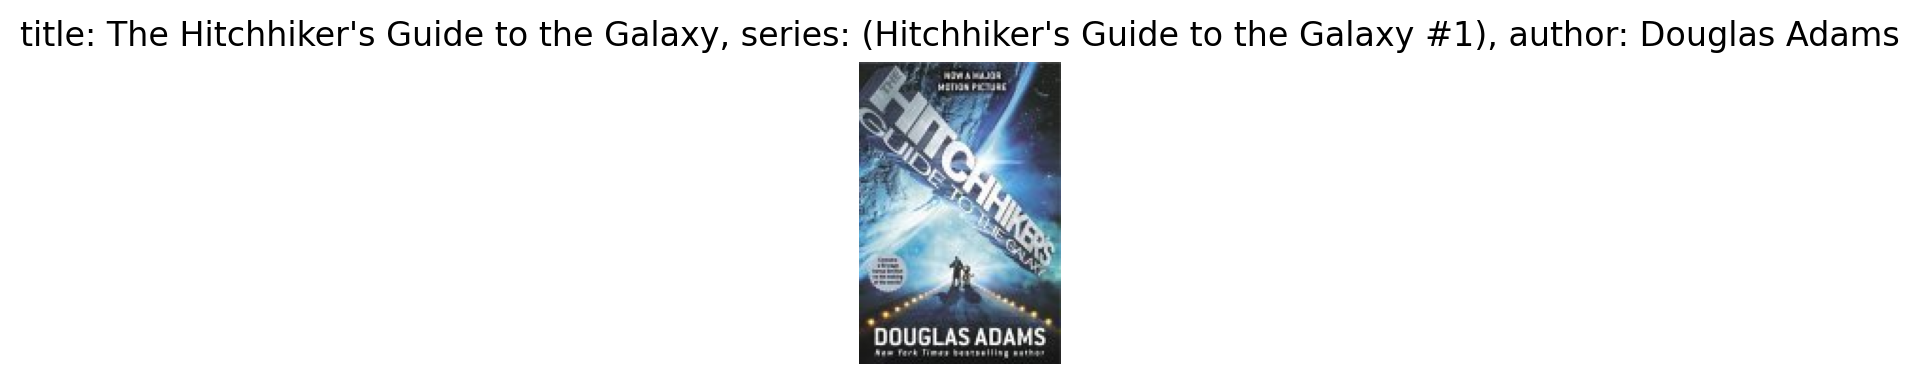

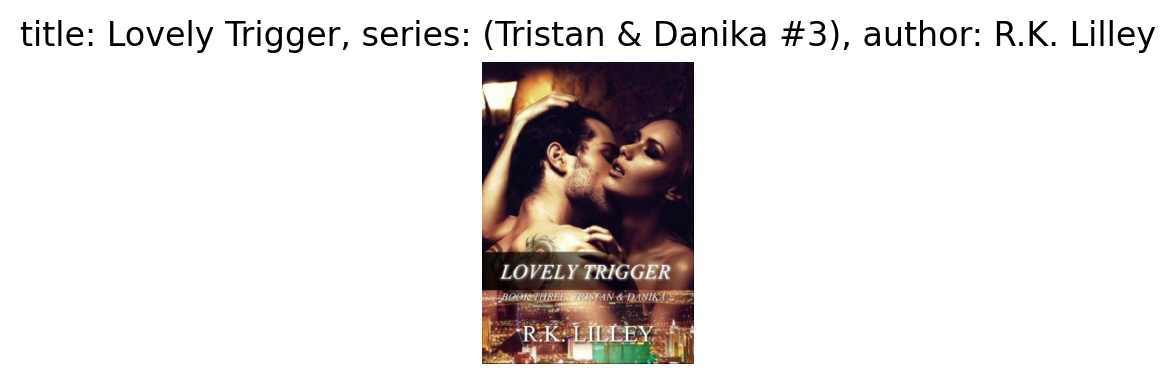

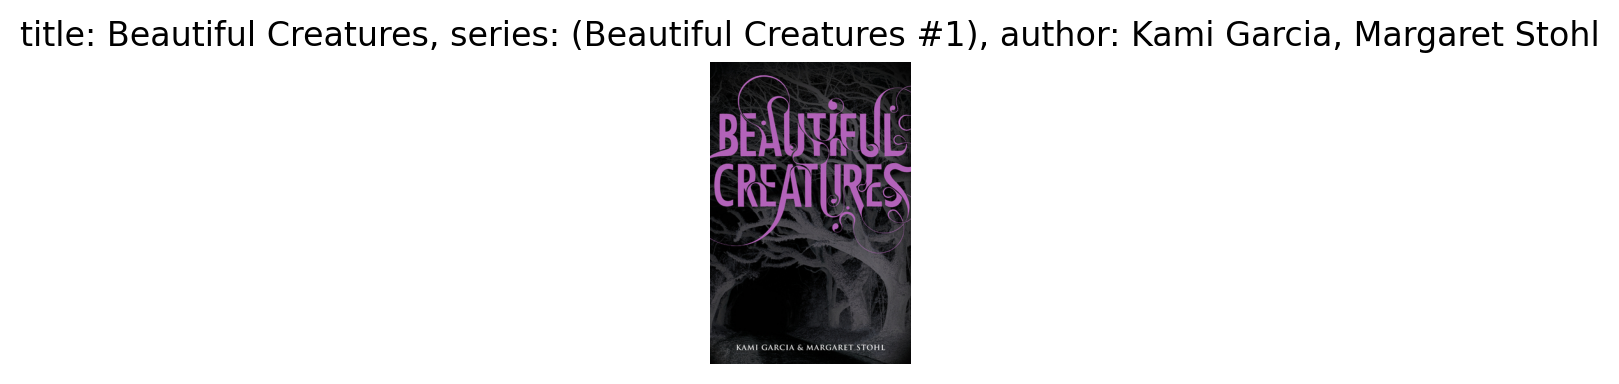

In [42]:
for id in recommended_books_stardust.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))

##### Room Book Recommendation

AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)
AxesImage(500,50;3100x302)


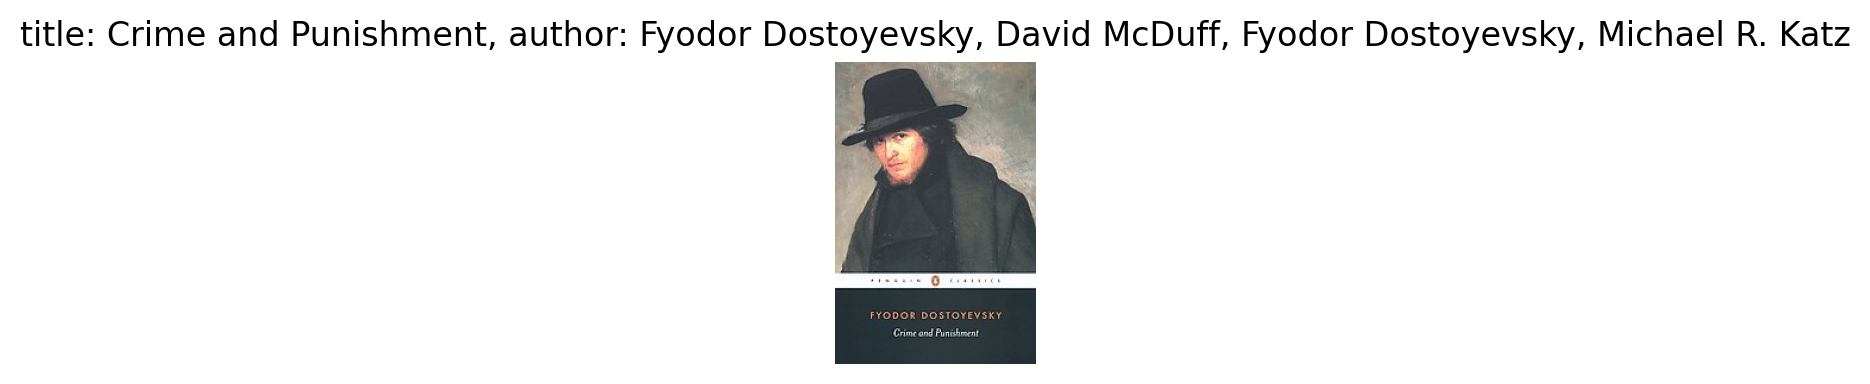

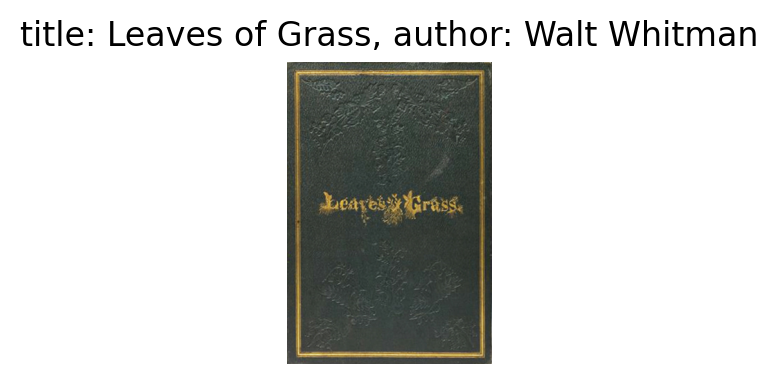

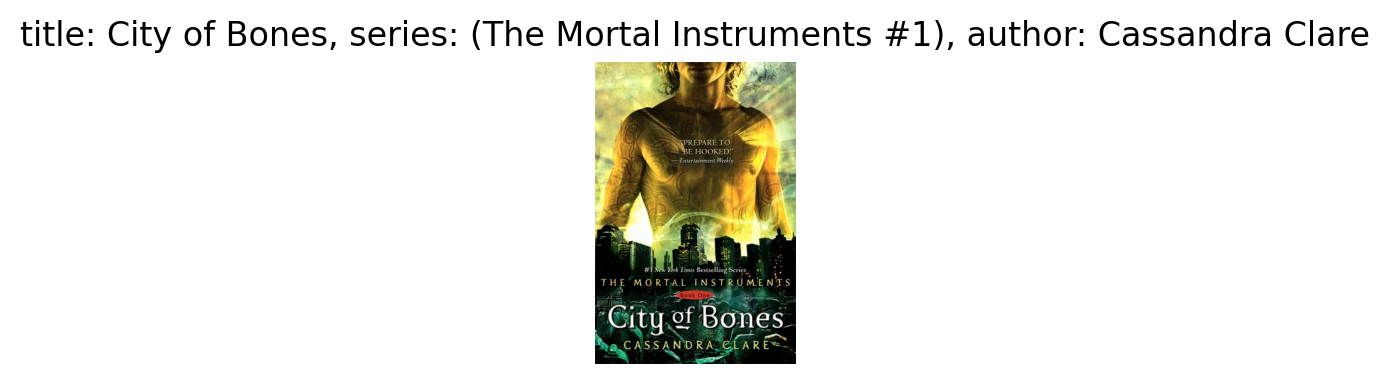

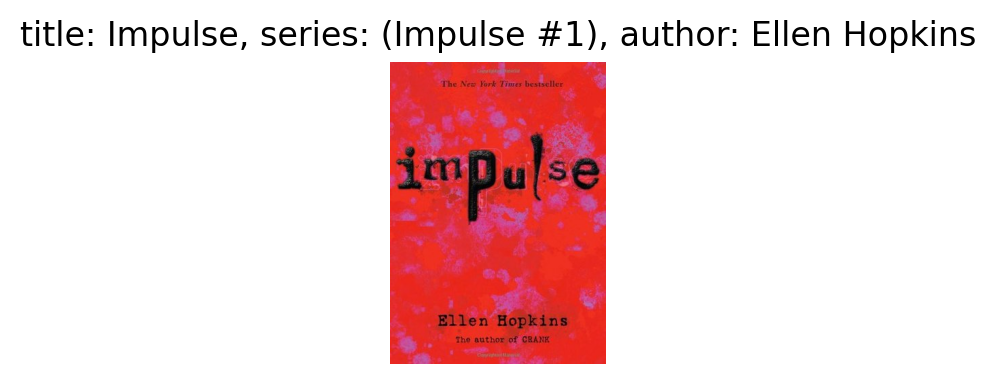

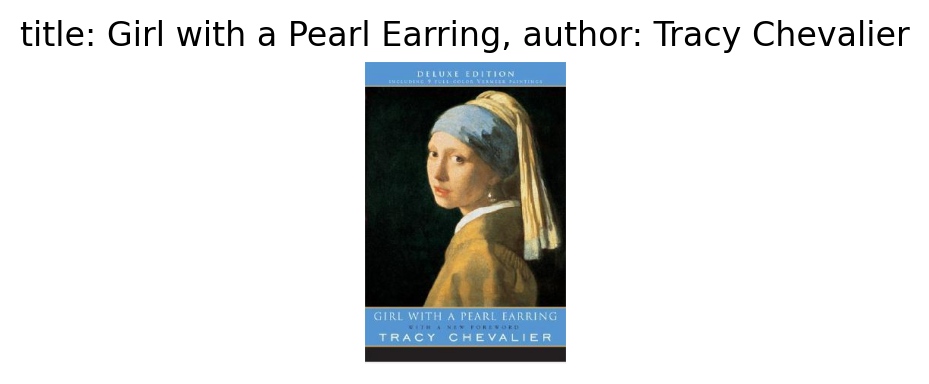

In [43]:
for id in recommended_books_room.index:
    print_cover_image(goodreads_books_tags.iloc[id]['cover_link'], print_format(
        goodreads_books_tags, id))


## Recommendation System Using Cosine Similarity

#### Cosine Similarity on average rating, tags, review_count, rating count

In [44]:
goodreads_books_tags_3 = goodreads_books_tags.copy()

goodreads_books_tags_3 = goodreads_books_tags_3

goodreads_books_tags_3.loc[(goodreads_books_tags_3['average_rating'] >= 0) & (goodreads_books_tags_3['average_rating'] <= 1),
                           'rating_between'] = "between 0 and 1"
goodreads_books_tags_3.loc[(goodreads_books_tags_3['average_rating'] > 1) & (goodreads_books_tags_3['average_rating'] <= 2),
                           'rating_between'] = "between 1 and 2"
goodreads_books_tags_3.loc[(goodreads_books_tags_3['average_rating'] > 2) & (goodreads_books_tags_3['average_rating'] <= 3),
                           'rating_between'] = "between 2 and 3"
goodreads_books_tags_3.loc[(goodreads_books_tags_3['average_rating'] > 3) & (goodreads_books_tags_3['average_rating'] <= 4),
                           'rating_between'] = "between 3 and 4"
goodreads_books_tags_3.loc[(goodreads_books_tags_3['average_rating'] > 4) & (goodreads_books_tags_3['average_rating'] <= 5),
                           'rating_between'] = "between 4 and 5"

# rating_counts
# goodreads_books_tags_3.head()


In [45]:
# from sklearn.metrics.pairwise import cosine_similarity

# books_features = pd.concat([goodreads_books_tags_3['rating_between'].str.get_dummies(
#     sep=","), goodreads_books_tags_3['tag_name'].str.get_dummies(
#     sep=","), goodreads_books_tags_3['average_rating'], goodreads_books_tags_3['rating_count'], goodreads_books_tags_3['review_count']], axis=1)

# books_features.head()

# min_max_scaler = MinMaxScaler()
# books_features = min_max_scaler.fit_transform(books_features)
# np.round(books_features, 2)

# cos_sim = cosine_similarity(books_features)

In [46]:
# toystory_top5 = np.argsort(cos_sim[0])[-5:][::-1]
# for i in toystory_top5:
#     print(print_format(goodreads_books_tags_3,i))
# goodreads_books_tags_3[goodreads_books_tags_3['title']=='Stardust']

#### Cosine similarity on review_count

In [52]:
#Creating the rating matrix (rows as books, columns as books)
goodreads_books_tags_3 = goodreads_books_tags.copy()
ratings_mat = np.ndarray(
    shape=(np.max(goodreads_books_tags_3.goodreads_book_id.index),
           np.max(goodreads_books_tags_3.goodreads_book_id.index)),
    dtype=np.uint8)
ratings_mat[np.max(goodreads_books_tags_3.goodreads_book_id.index) -
            1, np.max(goodreads_books_tags_3.goodreads_book_id.index)-1] = goodreads_books_tags_3.review_count.values

# #Normalizing the matrix(subtract mean off)
# normalised_mat = ratings_mat - np.asarray([(np.mean(ratings_mat, 1))]).T

# #Computing the Singular Value Decomposition (SVD)
# A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
# U, S, V = np.linalg.svd(A)


## Evaluation (TODO)

To Evaluate the performance of the different models you will need to make a determination on 
which model is better and explain the criteria you used to make the determination.

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Yarray = np.array(Y_test)


In [ ]:
attributeDiffMammalAndNonMammals = [
    {"column_name": "Hair", "column_id":"hair","condition": lambda rangeItem, 
        columnId: "mammal" if X_test.iloc[rangeItem,columnId] == True else "non-mammal"},
    {"column_name": "Eggs", "column_id": "eggs", "condition": lambda rangeItem,
        columnId: "mammal" if X_test.iloc[rangeItem, columnId] == False else "non-mammal"},
    {"column_name": "Milk", "column_id": "milk", "condition": lambda rangeItem,
        columnId: "mammal" if X_test.iloc[rangeItem, columnId] == True else "non-mammal"},
    {"column_name": "Aquatic", "column_id": "aquatic", "condition": lambda rangeItem,
     columnId: "mammal" if X_test.iloc[rangeItem, columnId] == False else "non-mammal"},
    {"column_name": "Toothed", "column_id": "toothed", "condition": lambda rangeItem,
        columnId: "mammal" if X_test.iloc[rangeItem, columnId] == True else "non-mammal"},
    {"column_name": "Breathes", "column_id": "breathes", "condition": lambda rangeItem,
        columnId: "mammal" if X_test.iloc[rangeItem, columnId] == True else "non-mammal"},
    {"column_name": "Domestic", "column_id": "domestic", "condition": lambda rangeItem,
     columnId: "mammal" if X_test.iloc[rangeItem, columnId] == True else "non-mammal"},
    {"column_name": "Catsize", "column_id": "catsize", "condition": lambda rangeItem,
        columnId: "mammal" if X_test.iloc[rangeItem, columnId] == True else "non-mammal"},
    {"column_name": "Legs", "column_id": "legs", "condition": lambda rangeItem,
     columnId: "mammal" if X_test.iloc[rangeItem, columnId] == 2 else "non-mammal"},
    {"column_name": "Gestation within", "column_id": "gestation_within", "condition": lambda rangeItem,
     columnId: "mammal" if X_test.iloc[rangeItem, columnId] in ["6 months","9 months","12 months"] else "non-mammal"},

]

for item in attributeDiffMammalAndNonMammals:
    columnId = X_test.columns.get_loc(item["column_id"]);
    predictions = []
    for r in range(0,len(X_test)):
        predictions.append(item["condition"](r,columnId))
    print(f"{item['column_name']} F1 score:", f1_score(
        Yarray, predictions, average='macro'))
    print(f"{item['column_name']} Accuracy score: ",
          accuracy_score(Yarray, predictions))
    cmatrix = confusion_matrix(Yarray, predictions)
    print(cmatrix)
    plt.figure(figsize=(10, 7))
    plt.title(f"{item['column_name']} Confusion Matrix")
    sns.heatmap(cmatrix, annot=True)
    print("---------------------------------------------------------")


In [ ]:
attributeNoDiffMammalAndNonMammals = [
    {"column_name": "Feathers", "column_id": "feathers", "condition": lambda rangeItem, 
    columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True,False] else 'mammal'},
    {"column_name": "Airborne", "column_id": "airborne", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},
    {"column_name": "Predators", "column_id": "predator", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},
    {"column_name": "Backbone", "column_id": "backbone", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},
    {"column_name": "Venomous", "column_id": "venomous", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},
    {"column_name": "Tail", "column_id": "tail", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},
    {"column_name": "Fins", "column_id": "fins", "condition": lambda rangeItem,
     columnId: "non-mammal" if X_test.iloc[rangeItem, columnId] in [True, False] else 'mammal'},

]

for item in attributeNoDiffMammalAndNonMammals:
    columnId = X_test.columns.get_loc(item["column_id"])
    predictions = []
    for r in range(0, len(X_test)):
        predictions.append(item["condition"](r, columnId))
    print(f"{item['column_name']} F1 score:", f1_score(
        Yarray, predictions, average='macro'))
    print(f"{item['column_name']} Accuracy score: ",
          accuracy_score(Yarray, predictions))
    cmatrix = confusion_matrix(Yarray, predictions)
    print(cmatrix)
    plt.figure(figsize=(10, 7))
    plt.title(f"{item['column_name']} Confusion Matrix")
    sns.heatmap(cmatrix, annot=True)
    print("---------------------------------------------------------")


In [ ]:
hairid = X_test.columns.get_loc('hair')
milkid = X_test.columns.get_loc('milk')
eggsid = X_test.columns.get_loc('eggs')
aquaid = X_test.columns.get_loc('aquatic')

pred = []
for r in range(0, len(X_test)):
    if X_test.iloc[r, hairid] == True and X_test.iloc[r, milkid] == True and X_test.iloc[r, eggsid] == False and X_test.iloc[r, aquaid] == False:
        pred.append('mammal')
    else:
        pred.append('non-mammal')

print("1-R F1 score:", f1_score(Yarray, pred, average='macro'))
print("1-R Accuracy score: ", accuracy_score(Yarray, pred))
cmatrix = confusion_matrix(Yarray, pred)
print(cmatrix)

plt.imshow(cmatrix, cmap='binary')


## Results (TODO)

For your Results you must demonstrate the books recommended by the recommender system 
for someone who has read Stardust by Neil Gaiman.  Then demonstrate the books 
recommended by the recommender system for one other book of your choice. 

## References:

[NumPy.Retrieved (2022, Jul 27)](https://numpy.org/doc/stable/index.html)

[Pandas Package. Retrieved (2022, Jul 27)](https://pandas.pydata.org/)

[Matplotlib.Retrieved (2022, Jul 27)](https://matplotlib.org/)

[Seaborn.Retrieved (2022, Jul 27)](https://seaborn.pydata.org/)
    
[Sk learn. Retrieved (2022, Jul 27)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    
[Syntax for filter function (2022, July 27)](https://stackabuse.com/map-filter-and-reduce-in-python-with-examples/)

[To read specific columns from CSV (2022, July 27)](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

[Selecting Columns from group_by object in pandas](https://stackoverflow.com/questions/19202093/how-to-select-columns-from-groupby-object-in-pandas)

[How to change the figure size for displot](https://stackoverflow.com/questions/65415646/how-to-change-the-figure-size-of-a-displot)

[Recommendation System Algorithms: An Overview](https://www.kdnuggets.com/2017/08/recommendation-system-algorithms-overview.html)